# <span style="color:red"> Joining Data with pandas </span>

# <span style="color:red"> Contenido </span>

# <span style="color:red"> Chapter 1 Data Merging Basics </span>

#     Inner join (VIDEO)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wards = pd.read_excel("wards.xlsx")
census = pd.read_excel("census.xlsx")

wards_altered = pd.read_excel("wards_altered.xlsx")
census_altered = pd.read_excel("census_altered.xlsx")

taxi_veh = pd.read_excel("taxi_veh.xlsx")
taxi_owners = pd.read_excel("taxi_owners.xlsx")

biz_owners = pd.read_excel("biz_owners.xlsx")
licenses = pd.read_excel("licenses.xlsx")

grants = pd.read_excel("grants.xlsx")

cal = pd.read_excel("cal.xlsx")
ridership = pd.read_excel("ridership.xlsx")
stations = pd.read_excel("stations.xlsx")

zip_demo = pd.read_excel("zip_demo.xlsx")

land_use = pd.read_excel("land_use.xlsx")

In [2]:
# INNER JOIN
# INNER JOIN = SOLO DEVOLVERA TUPLAS QUE CONTENGAN VALORES EN AMBAS TABLAS
print("----Metodo .merge() para realizar un Inner Join sobre la columna 'ward' de ambas tablas")
wards_census = wards.merge(census, on="ward")
print(wards_census.head(10))

# SUFFIXES
print("----Argumento suffixes para definir identificar a que tabla pertenecen las columnas")
wards_census = wards.merge(census, on="ward", suffixes=("_ward","_census"))
print(wards_census.head())

----Metodo .merge() para realizar un Inner Join sobre la columna 'ward' de ambas tablas
   ward               alderman                         address_x  zip_x  \
0     1     Proco "Joe" Moreno         2058 NORTH WESTERN AVENUE  60647   
1     2          Brian Hopkins         1400 NORTH ASHLAND AVENUE  60622   
2     3             Pat Dowell           5046 SOUTH STATE STREET  60609   
3     4       William D. Burns   435 EAST 35TH STREET, 1ST FLOOR  60616   
4     5     Leslie A. Hairston             2325 EAST 71ST STREET  60649   
5     6     Roderick T. Sawyer  8001 S. MARTIN LUTHER KING DRIVE  60619   
6     7    Gregory I. Mitchell             2249 EAST 95TH STREET  60617   
7     8     Michelle A. Harris   8539 SOUTH COTTAGE GROVE AVENUE  60619   
8     9       Anthony A. Beale               34 EAST 112TH PLACE  60628   
9    10  Susan Sadlowski Garza          10500 SOUTH EWING AVENUE  60617   

   pop_2000  pop_2010  change                                address_y  zip_y  
0     

# What column to merge on?

# Your first inner join

In [3]:
print("----Inner Join entre 2 tablas")
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid")
taxi_own_veh.head()

----Inner Join entre 2 tablas


,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [4]:
print("----Inner Join entre 2 tablas y seleccionar los sufijos para las columnas")
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid", suffixes=("_own","_veh"))
print(taxi_own_veh.head())

----Inner Join entre 2 tablas y seleccionar los sufijos para las columnas
      rid   vid       owner_own                 address    zip    make  \
0   T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630  NISSAN   
1   T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659   HONDA   
2   T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618  TOYOTA   
3   T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645  TOYOTA   
4   T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618  TOYOTA   

    model  year fuel_type       owner_veh  
0  ALTIMA  2011    HYBRID  AGEAN TAXI LLC  
1     CRV  2014  GASOLINE    MANGIB CORP.  
2  SIENNA  2015  GASOLINE   FUNRIDE, INC.  
3   CAMRY  2014    HYBRID    ALQUSH CORP.  
4  SIENNA  2015  GASOLINE  EUNIFFORD INC.  


In [5]:
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid",suffixes=("_own","_veh"))
taxi_own_veh["fuel_type"].value_counts()

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64

# Inner joins and number of rows returned

In [6]:
print("----Inner Join entre 2 tablas")
wards_census = wards.merge(census, on="ward")
print(wards_census.head())
print(wards_census.shape)

----Inner Join entre 2 tablas
   ward            alderman                        address_x  zip_x  pop_2000  \
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647     52951   
1     2       Brian Hopkins        1400 NORTH ASHLAND AVENUE  60622     54361   
2     3          Pat Dowell          5046 SOUTH STATE STREET  60609     40385   
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616     51953   
4     5  Leslie A. Hairston            2325 EAST 71ST STREET  60649     55302   

   pop_2010  change                                address_y  zip_y  
0     56149    0.06              2765 WEST SAINT MARY STREET  60647  
1     55805    0.03                 WM WASTE MANAGEMENT 1500  60622  
2     53039    0.31                      17 EAST 38TH STREET  60653  
3     54589    0.05  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653  
4     51455   -0.07  JACKSON PARK LAGOON SOUTH CORNELL DRIVE  60637  
(50, 9)


In [7]:
print("----Inner Join entre 2 tablas")
wards_altered_census = wards_altered.merge(census, on="ward")
print(wards_altered_census.head())
print(wards_altered_census.shape)

----Inner Join entre 2 tablas
   index  ward            alderman                         address_x  zip_x  \
0      1     2       Brian Hopkins         1400 NORTH ASHLAND AVENUE  60622   
1      2     3          Pat Dowell           5046 SOUTH STATE STREET  60609   
2      3     4    William D. Burns   435 EAST 35TH STREET, 1ST FLOOR  60616   
3      4     5  Leslie A. Hairston             2325 EAST 71ST STREET  60649   
4      5     6  Roderick T. Sawyer  8001 S. MARTIN LUTHER KING DRIVE  60619   

   pop_2000  pop_2010  change                                address_y  zip_y  
0     54361     55805    0.03                 WM WASTE MANAGEMENT 1500  60622  
1     40385     53039    0.31                      17 EAST 38TH STREET  60653  
2     51953     54589    0.05  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653  
3     55302     51455   -0.07  JACKSON PARK LAGOON SOUTH CORNELL DRIVE  60637  
4     54989     52341   -0.05                     150 WEST 74TH STREET  60636  
(49, 10)


In [8]:
print("----Inner Join entre 2 tablas")
# El tamaño de las tabla resutlantes es distinto ya que la tabla census está modificada
wards_census_altered = wards.merge(census_altered, on="ward")
print(wards_census_altered.head())
print(wards_census_altered.shape)

----Inner Join entre 2 tablas
  ward            alderman                         address_x  zip_x  index  \
0    2       Brian Hopkins         1400 NORTH ASHLAND AVENUE  60622      1   
1    3          Pat Dowell           5046 SOUTH STATE STREET  60609      2   
2    4    William D. Burns   435 EAST 35TH STREET, 1ST FLOOR  60616      3   
3    5  Leslie A. Hairston             2325 EAST 71ST STREET  60649      4   
4    6  Roderick T. Sawyer  8001 S. MARTIN LUTHER KING DRIVE  60619      5   

   pop_2000  pop_2010  change                                address_y  zip_y  
0     54361     55805    0.03                 WM WASTE MANAGEMENT 1500  60622  
1     40385     53039    0.31                      17 EAST 38TH STREET  60653  
2     51953     54589    0.05  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653  
3     55302     51455   -0.07  JACKSON PARK LAGOON SOUTH CORNELL DRIVE  60637  
4     54989     52341   -0.05                     150 WEST 74TH STREET  60636  
(49, 10)


#     One-to-many relationships (VIDEO)

In [9]:
# ONE TO ONE RELATIONSHIP
print("----Relacion uno a uno: Cada fila de la tabla izquierda esta relacionada a una y solo una\n",
"   fila de la izquierda")
ward_census = wards.merge(census, on="ward")
print(ward_census.head())


# ONE TO MANY RELATIONSHIP
print("----Relacion uno a muchos: Cada fila de la tabla izquierda está relacionada a uno o más\n",
"    filas de la tabla derecha")
wards_licenses = wards.merge(licenses, on="ward", suffixes=("_ward","_lic") )
print(wards_licenses)
print(wards.shape)
print(licenses.shape)
print(wards_licenses.shape)


----Relacion uno a uno: Cada fila de la tabla izquierda esta relacionada a una y solo una
    fila de la izquierda
   ward            alderman                        address_x  zip_x  pop_2000  \
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647     52951   
1     2       Brian Hopkins        1400 NORTH ASHLAND AVENUE  60622     54361   
2     3          Pat Dowell          5046 SOUTH STATE STREET  60609     40385   
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616     51953   
4     5  Leslie A. Hairston            2325 EAST 71ST STREET  60649     55302   

   pop_2010  change                                address_y  zip_y  
0     56149    0.06              2765 WEST SAINT MARY STREET  60647  
1     55805    0.03                 WM WASTE MANAGEMENT 1500  60622  
2     53039    0.31                      17 EAST 38TH STREET  60653  
3     54589    0.05  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653  
4     51455   -0.07  JACKSON PARK LAGOON SOUTH C

# One-to-many classification

# One-to-many merge

In [10]:
# licenses_owners
print("----Starting with the licenses table on the left, merge it to the biz_owners table on the column account. Save the results to a variable named licenses_owners.")
licenses_owners = licenses.merge(biz_owners, on="account")
print(licenses_owners)

print("----Group licenses_owners by title and count the number of accounts for each title. Save the result as counted_df")
# counted_df
counted_df = licenses_owners.groupby(["title"])["account"].count()
print(counted_df)

print("----Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df")
sorted_df = counted_df.sort_values(ascending=False)
print(sorted_df)

print("----Use the .head() method to print the first few rows of the sorted_df")
print(sorted_df.head())


----Starting with the licenses table on the left, merge it to the biz_owners table on the column account. Save the results to a variable named licenses_owners.
       account  ward  aid                 business  \
0       307071     3  743     REGGIE'S BAR & GRILL   
1           10    10  829               HONEYBEERS   
2           10    10  829               HONEYBEERS   
3        10002    14  775              CELINA DELI   
4        10002    14  775              CELINA DELI   
...        ...   ...  ...                      ...   
19492    86355    43  638     VOSGES HAUT-CHOCOLAT   
19493    86355    43  638     VOSGES HAUT-CHOCOLAT   
19494    86355    43  638     VOSGES HAUT-CHOCOLAT   
19495    86373    20  775  ALMUFLIHI FOOD & LIQUOR   
19496    86373    20  775  ALMUFLIHI FOOD & LIQUOR   

                          address      zip   first_name last_name        title  
0                 2105 S STATE ST  60616.0       ROBERT     GLICK       MEMBER  
1             13200 S HOUSTON

#     Merging multiple DataFrames (VIDEO)

----DataFrame Ward
   ward            alderman                          address    zip
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1     2       Brian Hopkins        1400 NORTH ASHLAND AVENUE  60622
2     3          Pat Dowell          5046 SOUTH STATE STREET  60609
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4     5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
----DataFrame Licenses
   account  ward  aid                   business               address  \
0   307071     3  743       REGGIE'S BAR & GRILL       2105 S STATE ST   
1       10    10  829                 HONEYBEERS   13200 S HOUSTON AVE   
2    10002    14  775                CELINA DELI     5089 S ARCHER AVE   
3    10005    12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST   
4    10044    44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE   

       zip  
0  60616.0  
1  60633.0  
2  60632.0  
3  60609.0  
4  60613.0  
----DataFrame Grants
      

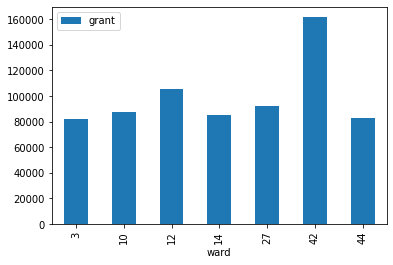

In [11]:
# DATAFRAMES TO MERGE
print("----DataFrame Ward")
print(wards.head())
print("----DataFrame Licenses")
print(licenses.head())
print("----DataFrame Grants")
print(grants.head())

# SINGLE MERGE
print("----Metodo .merge() y argumento ON= para cruzar 2 tablas sobre 2 columnas")
grants_licenses = grants.merge(licenses, on=["address","zip"])
print(grants_licenses)

# MERGING MULTIPLE TABLES
print("----Metodo .merge() para cruzar 3 o mas tablas")
grants_licenses_wards = grants.merge(licenses, on=["address","zip"]).merge(wards, on="ward", suffixes=("_bus","_ward"))
print(grants_licenses_wards)

print("----Escribiendo en 2 lineas")
grants_licenses_wards = grants.merge(licenses, on =["address","zip"]) \
    .merge(wards, on="ward", suffixes=("_bus","_wards"))

# BARPLOT of RESULTS
print("----Grafica con el presupuesto de cada barrio")
import matplotlib.pyplot as plt
grants_licenses_wards.groupby("ward").aggregate(sum).plot(kind="bar", y = "grant")
plt.show()


# Total riders in a month

In [12]:
# Instructions 1/3
# 50 XP
# 1
# Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. 
# If you code takes too long to run, your merge conditions might be incorrect.

print("----Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal")
ridership_cal = ridership.merge(cal, on=["year","month","day"])
print(ridership_cal)

----Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal
      station_id  year  month  day  rides        day_type
0          40010  2019      1    1    576  Sunday/Holiday
1          40080  2019      1    1   1839  Sunday/Holiday
2          40770  2019      1    1   2724  Sunday/Holiday
3          40120  2019      1    1    754  Sunday/Holiday
4          40540  2019      1    1   2175  Sunday/Holiday
...          ...   ...    ...  ...    ...             ...
3280       40540  2019     12   31   4355         Weekday
3281       41260  2019     12   31   1228         Weekday
3282       41500  2019     12   31   1685         Weekday
3283       41440  2019     12   31   1370         Weekday
3284       41660  2019     12   31  13430         Weekday

[3285 rows x 6 columns]


In [13]:
# Instructions 2/3
# 50 XP
# 3
# Extend the previous merge to three tables by also merging the stations table.

ridership_cal_stations = ridership.merge(cal, on=["year","month","day"]).merge(stations, on="station_id")
print(ridership_cal_stations)

      station_id  year  month  day  rides        day_type        station_name  \
0          40010  2019      1    1    576  Sunday/Holiday  Austin-Forest Park   
1          40010  2019      1    2   1457         Weekday  Austin-Forest Park   
2          40010  2019      1    3   1543         Weekday  Austin-Forest Park   
3          40010  2019      1    4   1621         Weekday  Austin-Forest Park   
4          40010  2019      1    5    719        Saturday  Austin-Forest Park   
...          ...   ...    ...  ...    ...             ...                 ...   
3280       41660  2019     12   27  13898         Weekday          Lake/State   
3281       41660  2019     12   28   9485        Saturday          Lake/State   
3282       41660  2019     12   29   7581  Sunday/Holiday          Lake/State   
3283       41660  2019     12   30  15332         Weekday          Lake/State   
3284       41660  2019     12   31  13430         Weekday          Lake/State   

                     locati

In [14]:
# Instructions 3/3
# 0 XP
# 3
# Create a variable called filter_criteria to select the appropriate rows from the merged table so that you can sum the rides column.
# Remember your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') 
# when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7).

print("----Base final con información de viajes")
print(ridership_cal_stations)
filas = (ridership_cal_stations["station_name"] == "Wilson") & (ridership_cal_stations["day_type"] == "Weekday") & (ridership_cal_stations["month"] == 7)
print("----Base filtrada con informacion de la estacion Wilson, de Weekday y Julio")
print(ridership_cal_stations[filas])
print("----Total de viajes tales en la estacion Wilson, de Weekday y Julio")
print(ridership_cal_stations[filas]["rides"].sum())

----Base final con información de viajes
      station_id  year  month  day  rides        day_type        station_name  \
0          40010  2019      1    1    576  Sunday/Holiday  Austin-Forest Park   
1          40010  2019      1    2   1457         Weekday  Austin-Forest Park   
2          40010  2019      1    3   1543         Weekday  Austin-Forest Park   
3          40010  2019      1    4   1621         Weekday  Austin-Forest Park   
4          40010  2019      1    5    719        Saturday  Austin-Forest Park   
...          ...   ...    ...  ...    ...             ...                 ...   
3280       41660  2019     12   27  13898         Weekday          Lake/State   
3281       41660  2019     12   28   9485        Saturday          Lake/State   
3282       41660  2019     12   29   7581  Sunday/Holiday          Lake/State   
3283       41660  2019     12   30  15332         Weekday          Lake/State   
3284       41660  2019     12   31  13430         Weekday          L

# Three table merge

In [15]:
# Instructions
# 100 XP
# Starting with the licenses table, merge to it the zip_demo table on the zip column. 
# Then merge the resulting table to the wards table on the ward column. 
# Save result of the three merged tables to a variable named licenses_zip_ward.
# Group the results of the three merged tables by the column alderman and find the median income.

print("----Starting with the licenses table, merge to it the zip_demo table on the zip column")
print("----Then merge the resulting table to the wards table on the ward column")
print("----Save result of the three merged tables to a variable named licenses_zip_ward.")
licenses_zip_ward = licenses.merge(zip_demo, on="zip").merge(wards, on="ward")
print(licenses_zip_ward)

print("----Group the results of the three merged tables by the column alderman and find the median income")
print(licenses_zip_ward.groupby("alderman")["income"].agg(np.median))


----Starting with the licenses table, merge to it the zip_demo table on the zip column
----Then merge the resulting table to the wards table on the ward column
----Save result of the three merged tables to a variable named licenses_zip_ward.
      account  ward  aid                   business                address_x  \
0      307071     3  743       REGGIE'S BAR & GRILL          2105 S STATE ST   
1       11280     3  763                  PRIME WAY      2251 S STATE ST 1ST   
2       15015     3  NaN      SOUTHVIEW MANOR, INC.      3311 S MICHIGAN AVE   
3       19168     3  666                   BP AMOCO  3101 S MICHIGAN AVE 1ST   
4      205980     3  763       J & J FISH & CHICKEN            8 E CERMAK RD   
...       ...   ...  ...                        ...                      ...   
9989   278535    18  NaN       LOOP DEVELOPMENT PTR           3135 W 71ST ST   
9990    35801    18  NaN    MOTHER'S TOUCH DAY CARE       2501 W 71ST ST 1ST   
9991   395464    18  894      Brother'

# One-to-many merge with multiple tables

In [16]:
# Instructions 1/3
# 35 XP
#1
# Merge land_use and census on the ward column. 
# Merge the result of this with licenses on the ward column, using the suffix _cen for the left table and _lic for the right table. 
# Save this to the variable land_cen_lic.

print("----DataFrame land_use")
print(land_use.head())
print("----DataFrame census")
print(census.head())
print("----DataFrame licenses")
print(licenses.head())
print("----Join entre estos 3 DataFrame")
land_cen_lic = land_use.merge(census, on="ward").merge(licenses, on="ward", suffixes=("_cen","_lic"))
print(land_cen_lic.head())


----DataFrame land_use
   ward  residential  commercial  industrial  vacant  other
0     1           41           9           2       2     46
1     2           31          11           6       2     50
2     3           20           5           3      13     59
3     4           22          13           0       7     58
4     5           25           3           1       3     68
----DataFrame census
   ward  pop_2000  pop_2010  change                                  address  \
0     1     52951     56149    0.06              2765 WEST SAINT MARY STREET   
1     2     54361     55805    0.03                 WM WASTE MANAGEMENT 1500   
2     3     40385     53039    0.31                      17 EAST 38TH STREET   
3     4     51953     54589    0.05  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4     5     55302     51455   -0.07  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  
----DataFrame licenses
   account  ward  aid     

In [17]:
# Instructions 2/3
# 35 XP
# 2
# Group land_cen_lic by ward, pop_2010 (the population in 2010), and vacant, then count the number of accounts. Save the results to pop_vac_lic.

pop_vac_lic = land_cen_lic.groupby(["ward","pop_2010","vacant"])["account"].count()
pop_vac_lic = pop_vac_lic.reset_index()
print(pop_vac_lic.head())

   ward  pop_2010  vacant  account
0     1     56149       2      253
1     2     55805       2      301
2     3     53039      13      173
3     4     54589       7      160
4     5     51455       3      104


In [18]:
# Instructions 3/3
# 30 XP
# 3
# Sort pop_vac_lic by vacant, account, and pop_2010 in descending, ascending, and ascending order respectively. Save it as sorted_pop_vac_lic.

sorted_pop_vac_lic =  pop_vac_lic.sort_values(by=["vacant","account","pop_2010"], ascending=[False,True,True])
print(sorted_pop_vac_lic.head())

    ward  pop_2010  vacant  account
6      7     51581      19       80
19    20     52372      15      123
9     10     51535      14      130
23    24     54909      13       98
15    16     51954      13      156


# <span style="color:red"> Chapter 2 Merging Tables With Different Join Types </span>

In [19]:
# Lectura de archivos para el capítulo

movies = pd.read_excel("movies.xlsx")
taglines = pd.read_excel("taglines.xlsx")
toy_story = pd.read_excel("toy_story.xlsx")
financials = pd.read_excel("financials.xlsx")
left_table = pd.read_excel("left_table.xlsx")
one_to_one = pd.read_excel("one_to_one.xlsx")
one_to_many = pd.read_excel("one_to_many.xlsx")

scifi_movies = pd.read_excel("scifi_movies.xlsx")
action_movies = pd.read_excel("action_movies.xlsx")
pop_movies = pd.read_excel("pop_movies.xlsx")
movie_to_genres = pd.read_excel("movie_to_genres.xlsx")
iron_1_actors = pd.read_excel("iron_1_actors.xlsx")
iron_2_actors = pd.read_excel("iron_2_actors.xlsx")

crews = pd.read_excel("crews.xlsx")
ratings = pd.read_excel("ratings.xlsx")
sequels = pd.read_excel("sequels.xlsx")
cast = pd.read_excel("cast.xlsx")
samuel = pd.read_excel("samuel.xlsx")

##     Left join (VIDEO)

In [20]:
# MERGE WITH LEFT JOIN
print("----Metodo .merge() y argumento how='left' para realizar un Left Join")
movies_taglines = movies.merge(taglines, on="id", how="left")
print(movies_taglines.head())

----Metodo .merge() y argumento how='left' para realizar un Left Join
      id                 title  popularity release_date  \
0    257          Oliver Twist   20.415572   2005-09-23   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12   
2  38365             Grown Ups   38.864027   2010-06-24   
3   9672              Infamous    3.680896   2006-11-16   
4  12819       Alpha and Omega   12.300789   2010-09-17   

                                           tagline  
0                                              NaN  
1             Never underestimate an overachiever.  
2  Boys will be boys. . . some longer than others.  
3          There's more to the story than you know  
4                           A Pawsome 3D Adventure  


## Counting missing rows with left join


In [21]:
# Instructions 1/3
# 35 XP
# 1
# Question
# What column is likely the best column to merge the two tables on?
# Possible Answers:
#    on='budget'
#    on='popularity'
#    on='id'          <- Repuesta correcta

In [22]:
# Instructions 2/3
# 35 XP
# 2
# Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.

movies_financials = movies.merge(financials, on="id", how = "left")
print(movies_financials.head())

      id                 title  popularity release_date      budget  \
0    257          Oliver Twist   20.415572   2005-09-23  50000000.0   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12         NaN   
2  38365             Grown Ups   38.864027   2010-06-24  80000000.0   
3   9672              Infamous    3.680896   2006-11-16  13000000.0   
4  12819       Alpha and Omega   12.300789   2010-09-17  20000000.0   

       revenue  
0   42093710.0  
1          NaN  
2  271430200.0  
3    1151330.0  
4   39300000.0  


In [23]:
# Instructions 3/3
# 30 XP
# 3
# Count the number of rows in movies_financials with a null value in the budget column.

number_of_missing_fin = movies_financials["budget"].isnull().sum()
print("Numero de valores Na:", number_of_missing_fin)

Numero de valores Na: 1574


In [24]:
# You used a left join to find out which rows in the financials table were missing data. 
# When performing a left join, the .merge() method returns a row full of null values for columns in the right table 
# if the key column does not have a matching value in both tables. We see that there are at least 1,500 rows missing data. Wow! 
# That sounds like a lot of work.

# Enriching a dataset


Enriching a dataset
Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. 
In this exercise, you will start off with a sample of movie data from the movie series Toy Story. 
Your goal is to enrich this data by adding the marketing tag line for each movie. 
You will compare the results of a left join versus an inner join.

The toy_story DataFrame contains the Toy Story movies. The toy_story and taglines DataFrames have been loaded for you.

In [25]:
# Instructions 1/2
# 50 XP
# 1
# Merge toy_story and taglines on the id column with a left join, and save the result as toystory_tag.

toystory_tag = toy_story.merge(taglines, on="id", how="left")
print(toystory_tag)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN


In [26]:
# Instructions 2/2
# 50 XP
# 2
# With toy_story as the left table, merge to it taglines on the id column with an inner join, and save as toystory_tag.

toystory_tag = toy_story.merge(taglines, on="id", how="inner")
print(toystory_tag)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!


In [27]:
# That's fantastic work! If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. 
# A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data 
# if it does not exist in both tables.

# How many rows with a left join?


In [28]:
# Instructions
# 50 XP
# Possible Answers

# The output of a one-to-one merge with a left join will have more rows than the left table.
# The output of a one-to-one merge with a left join will have fewer rows than the left table.
# The output of a one-to-many merge with a left join will have greater than or equal rows than the left table.

print("----Dimension del DF left_table")
print(left_table.shape)
print("----Dimension del DF one_to_one")
print(one_to_one.shape)
print("----Dimension del DF one_to_many")
print(one_to_many.shape)

print("----Resultado de 'left_table' left join con 'one_to_one' ")
print(left_table.merge(one_to_one, on="id", how="left").shape)
print("----Resultado de 'left_table' left join con 'one_to_many' ")
print(left_table.merge(one_to_many, on="id", how="left").shape)

----Dimension del DF left_table
(4, 4)
----Dimension del DF one_to_one
(3955, 2)
----Dimension del DF one_to_many
(42502, 3)
----Resultado de 'left_table' left join con 'one_to_one' 
(4, 5)
----Resultado de 'left_table' left join con 'one_to_many' 
(232, 6)


In [29]:
# That's correct! A left join will return all of the rows from the left table. 
# If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. 
# Therefore, the returned rows must be equal to if not greater than the left table. 
# Knowing what to expect is useful in troubleshooting any suspicious merges.

#     Other joins (VIDEO)

In [30]:
tv_genre = movie_to_genres[movie_to_genres["genre"]=="TV Movie"]
family = movie_to_genres[movie_to_genres["genre"]=="Family"]
comedy = movie_to_genres[movie_to_genres["genre"]=="Comedy"]
print("----DataFrame movies")
print(movies.head())
print("----DataFrame tv_genre")
print(tv_genre.head())
print("----DataFrame family")
print(family.head())
print("----DataFrame comedy")
print(comedy.head())

# ARGUMENTS RIGHT_ON='' AND LEFT_ON=''
print("----Metodo .merge() y argumento how='right' y argumentos left_on='' y right_on='' para indicar sobre que columna hacer el Join")
tv_movies = movies.merge(tv_genre, how="right", left_on="id", right_on="movie_id")
print(tv_movies.head())

# OUTER JOIN
print("----Metodo .merge() y argumento how='outer' ")
family_comedy = family.merge(comedy, on="movie_id", how="outer", suffixes=("_fam","_com"))
print(family_comedy.head())

----DataFrame movies
      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
----DataFrame tv_genre
       movie_id     genre
4998      10947  TV Movie
5994      13187  TV Movie
7443      22488  TV Movie
10061     78814  TV Movie
10790    153397  TV Movie
----DataFrame family
     movie_id   genre
5          12  Family
33         35  Family
111       105  Family
139       118  Family
156       129  Family
----DataFrame comedy
    movie_id   genre
1          5  Comedy
7         13  Comedy
35        35  Comedy
54        68  Comedy
61        71  Comedy
----Metodo .merge() y argumento how='right' y argumentos left_on='' y right_on='' para indicar sobre que columna hacer el Join
       id                      title 

# Right join to find unique movies

In [31]:
# Instructions 
# 25 XP
# 1
# Merge action_movies and scifi_movies tables with a right join on movie_id. Save the result as action_scifi.

action_scifi = action_movies.merge(scifi_movies, on="movie_id", how="right")
print(action_scifi)

     movie_id  genre_x           genre_y
0          11   Action   Science Fiction
1          18   Action   Science Fiction
2          19      NaN   Science Fiction
3          38      NaN   Science Fiction
4          62      NaN   Science Fiction
..        ...      ...               ...
530    335866      NaN   Science Fiction
531    347548      NaN   Science Fiction
532    360188      NaN   Science Fiction
533    367551   Action   Science Fiction
534    371690      NaN   Science Fiction

[535 rows x 3 columns]


In [32]:
# Instructions 2/4
# 25 XP
# 2
# Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.

action_scifi = action_movies.merge(scifi_movies, on="movie_id", how="right", suffixes=("_act","_sci"))
print(action_scifi)

     movie_id genre_act         genre_sci
0          11    Action   Science Fiction
1          18    Action   Science Fiction
2          19       NaN   Science Fiction
3          38       NaN   Science Fiction
4          62       NaN   Science Fiction
..        ...       ...               ...
530    335866       NaN   Science Fiction
531    347548       NaN   Science Fiction
532    360188       NaN   Science Fiction
533    367551    Action   Science Fiction
534    371690       NaN   Science Fiction

[535 rows x 3 columns]


In [33]:
# Instructions 3/4
# 25 XP
# 3
# From action_scifi, subset only the rows where the genre_act column is null.

scifi_only = action_scifi[action_scifi["genre_act"].isna()]
print(scifi_only)

     movie_id genre_act         genre_sci
2          19       NaN   Science Fiction
3          38       NaN   Science Fiction
4          62       NaN   Science Fiction
5          68       NaN   Science Fiction
6          74       NaN   Science Fiction
..        ...       ...               ...
529    333371       NaN   Science Fiction
530    335866       NaN   Science Fiction
531    347548       NaN   Science Fiction
532    360188       NaN   Science Fiction
534    371690       NaN   Science Fiction

[258 rows x 3 columns]


In [34]:
# Instructions 4/4
# 25 XP
# 4
# Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.

movies_and_scifi_only = movies.merge(scifi_only, left_on="id", right_on="movie_id", how="inner")
print(movies_and_scifi_only)

         id                         title  popularity release_date  movie_id  \
0     18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1     26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2     15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3      8452                   The 6th Day   18.447479   2000-11-17      8452   
4      1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   
..      ...                           ...         ...          ...       ...   
253  245703              Midnight Special   32.717853   2016-02-18    245703   
254    3509              A Scanner Darkly   26.093043   2006-05-25      3509   
255   42188               Never Let Me Go   30.983397   2010-09-15     42188   
256   18045                The Dark Hours    1.428483   2005-03-11     18045   
257   11058                       Godsend   12.102350   2004-04-30     11058   

    genre_act         genre_sci  
0    

In [35]:
# Well done, right join to the rescue! 
# You found over 250 action only movies by merging action_movies and scifi_movies using a right join. 
# With this, you were able to find the rows not found in the action_movies table. 
# Additionally, you used the left_on and right_on arguments to merge in the movies table. Wow! You are a superhero.

# Popular genres with right join


----Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.
   movie_id      genre  index      id         title  popularity release_date
0    211672     Comedy   4546  211672       Minions  875.581305   2015-06-17
1    211672  Adventure   4546  211672       Minions  875.581305   2015-06-17
2    211672  Animation   4546  211672       Minions  875.581305   2015-06-17
3    211672     Family   4546  211672       Minions  875.581305   2015-06-17
4    157336      Drama   4343  157336  Interstellar  724.247784   2014-11-05
----Group genres_movies by genre and count the number of id values. Save result as genre_count
                 id
genre              
Action            7
Adventure         9
Animation         2
Comedy            3
Drama             2
Family            2
Fantasy           1
Science Fiction   6
Thriller          4


C:\Users\ncr\AppData\Local\Temp\ipykernel_14864\2852105331.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre_count.index, rotation=90)


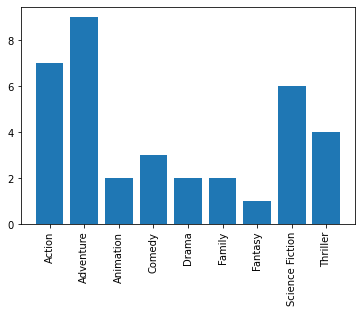

In [36]:
# Instructions
# 100 XP
# Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.
# Group genres_movies by genre and count the number of id values.

print("----Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.")
genres_movies = movie_to_genres.merge(pop_movies, left_on="movie_id", right_on="id", how="right")
print(genres_movies.head())

print("----Group genres_movies by genre and count the number of id values. Save result as genre_count")
genre_count = genres_movies.groupby(["genre"]).agg({'id':'count'})
print(genre_count)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(genre_count.index, genre_count["id"])
ax.set_xticklabels(genre_count.index, rotation=90)
plt.show()

In [37]:
# Nice job! The right join ensured that you were analyzing all of the pop_movies. 
# You see from the results that adventure and action are the most popular genres.

# Using outer join to select actors


In [38]:
# Instructions
# 100 XP
# Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2').
# Create an index that returns True if name_1 or name_2 are null, and False otherwise.

print("----Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2')")
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on="id", how="outer", suffixes=("_1","_2"))
print(iron_1_and_2.head())


print("----Create an index that returns True if name_1 or name_2 are null, and False otherwise")
m = (iron_1_and_2["name_1"].isnull())  |  (iron_1_and_2["name_2"].isnull())
print(iron_1_and_2[m])

----Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2')
                   character_1     id           name_1  \
0                       Yinsen  17857       Shaun Toub   
1      Virginia "Pepper" Potts  12052  Gwyneth Paltrow   
2  Obadiah Stane / Iron Monger   1229     Jeff Bridges   
3                  War Machine  18288  Terrence Howard   
4           Christine Everhart  57451      Leslie Bibb   

               character_2           name_2  
0                      NaN              NaN  
1  Virginia "Pepper" Potts  Gwyneth Paltrow  
2                      NaN              NaN  
3                      NaN              NaN  
4       Christine Everhart      Leslie Bibb  
----Create an index that returns True if name_1 or name_2 are null, and False otherwise
                     character_1       id           name_1  \
0                         Yinsen    17857       Shaun Toub   
2    Obad

In [39]:
# Using an outer join, you were able to pick only those rows where the actor played in only one of the two movies.

# Merging a table to itsel (Video)

In [40]:

# MERGING A TABLE WITH ITSELF USING INNER JOIN
print("----Data Frame con información de películas y su secuelas")
print(sequels.head())
print("----Metodo .merge() para hacer un Join de la tabla consigo misma")
original_sequels = sequels.merge(sequels, left_on="sequel", right_on="id", suffixes=("_org","_seq"))
print(original_sequels.head())


# MERGING A TABLE TO ITSELF WITH LEFT JOIN
print("----Metodo .merge() para hacer un Left Join de la tabla consigo misma")
original_sequels = sequels.merge(sequels, left_on="sequel", right_on="id", how="left", suffixes=("_org","_seq"))
print(original_sequels.head())

# WHEN TO MERGE A TABLE WITH ITSEL?
# Hierrarchical relationships
# Sequential relationships

----Data Frame con información de películas y su secuelas
      id         title   sequel
0  19995        Avatar      NaN
1    862     Toy Story    863.0
2    863   Toy Story 2  10193.0
3    597       Titanic      NaN
4  24428  The Avengers      NaN
----Metodo .merge() para hacer un Join de la tabla consigo misma
   id_org                                          title_org  sequel_org  \
0     862                                          Toy Story       863.0   
1     863                                        Toy Story 2     10193.0   
2     675          Harry Potter and the Order of the Phoenix       767.0   
3     121              The Lord of the Rings: The Two Towers       122.0   
4     120  The Lord of the Rings: The Fellowship of the Ring       121.0   

   id_seq                                      title_seq  sequel_seq  
0     863                                    Toy Story 2     10193.0  
1   10193                                    Toy Story 3         NaN  
2     767      

# Self join


In [41]:
# Instructions 1/3
# 35 XP
# 1
# To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, 
# setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.

crews_self_merged = crews.merge(crews, on="id", how="inner",suffixes=("_dir","_crew"))
print(crews_self_merged.head())

      id job_dir           name_dir        job_crew          name_crew
0  19995  Editor  Stephen E. Rivkin          Editor  Stephen E. Rivkin
1  19995  Editor  Stephen E. Rivkin  Sound Designer  Christopher Boyes
2  19995  Editor  Stephen E. Rivkin         Casting          Mali Finn
3  19995  Editor  Stephen E. Rivkin        Director      James Cameron
4  19995  Editor  Stephen E. Rivkin          Writer      James Cameron


In [42]:
# Instructions 2/3
# 35 XP
# 2
# Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and 
# avoids rows with the job of 'Director' in the right table.

boolean_filter =  (crews_self_merged["job_dir"]=="Director") & (crews_self_merged["job_crew"]!="Directos") 
print(boolean_filter)

0         False
1         False
2         False
3         False
4         False
          ...  
834189     True
834190     True
834191     True
834192     True
834193     True
Length: 834194, dtype: bool


In [43]:
# Instructions 3/3
# 30 XP
# 3
# Use the .head() method to print the first few rows of direct_crews.

direct_crews = crews_self_merged[boolean_filter]
print(direct_crews)

           id   job_dir       name_dir            job_crew          name_crew
156     19995  Director  James Cameron              Editor  Stephen E. Rivkin
157     19995  Director  James Cameron      Sound Designer  Christopher Boyes
158     19995  Director  James Cameron             Casting          Mali Finn
159     19995  Director  James Cameron            Director      James Cameron
160     19995  Director  James Cameron              Writer      James Cameron
...       ...       ...            ...                 ...                ...
834189  25975  Director       Jon Gunn            Director         Brett Winn
834190  25975  Director     Brett Winn  Executive Producer     Clark Peterson
834191  25975  Director     Brett Winn            Director   Brian Herzlinger
834192  25975  Director     Brett Winn            Director           Jon Gunn
834193  25975  Director     Brett Winn            Director         Brett Winn

[47569 rows x 5 columns]


In [44]:
# By merging the table to itself, you compared the value of the director from the jobs column to other values from the jobs column. 
# With the output, you can quickly see different movie directors and the people they worked with in the same movie.

# How does pandas handle self joins?


In [45]:
# Select the false statement about merging a table to itself.

# Answer the question
# 50XP
# Possible Answers

#        You can merge a table to itself with a right join.

#        Merging a table to itself can allow you to compare values in a column to other values in the same column.

#        The Pandas module limits you to one merge where you merge a table to itself. You cannot repeat this process over and over.  <- Respuesta Correcta

#        Merging a table to itself is like working with two separate tables.

# Submit Answer
# Take Hint (-15 XP)

In [46]:
# Perfect! This statement is false. 
# Pandas treats a merge of a table to itself the same as any other merge. 
# Therefore, it does not limit you from chaining multiple .merge() methods together.

# Merging on indexes (Video)


In [47]:
# SETTING AN INDEX OF A DATA FRAME
movies = movies.set_index("id")
taglines = taglines.set_index("id")
samuel = samuel.set_index(["movie_id","cast_id"])
cast = cast.set_index(["movie_id","cast_id"])
movie_to_genres = movie_to_genres.set_index(["movie_id"])


# MERGING ON INDEX
print("----Metodo .merge() para realizar un Join con los indices como pivotes")
movies_taglines = movies.merge(taglines, on="id", how="left")
print(movies_taglines.head())

# MULTI-INDEX MERGE
print("----Metodo .merge() para realizar un Join con multiples indices como pivotes")
samuel_cast = samuel.merge(cast, on=["movie_id","cast_id"], how="inner")
print(samuel_cast.head())

# MERGING INDEX WITH RIGHT_ON AND LEFT_ON
print("----MEtodo .merge() y argumento on_ para indices con diferente nombre en cada tabla")
movies_genres = movies.merge(movie_to_genres,left_index=True,right_index=True)
print(movies_genres)

# RESETEAR LOS INDICES DE LOS DATA FRAMES
movies = movies.reset_index()
taglines = taglines.reset_index()
samuel = samuel.reset_index()
cast = cast.reset_index()
movie_to_genres = movie_to_genres.reset_index()

----Metodo .merge() para realizar un Join con los indices como pivotes
                      title  popularity release_date  \
id                                                     
257            Oliver Twist   20.415572   2005-09-23   
14290  Better Luck Tomorrow    3.877036   2002-01-12   
38365             Grown Ups   38.864027   2010-06-24   
9672               Infamous    3.680896   2006-11-16   
12819       Alpha and Omega   12.300789   2010-09-17   

                                               tagline  
id                                                      
257                                                NaN  
14290             Never underestimate an overachiever.  
38365  Boys will be boys. . . some longer than others.  
9672           There's more to the story than you know  
12819                           A Pawsome 3D Adventure  
----Metodo .merge() para realizar un Join con multiples indices como pivotes
                             name_x      character  gender  

# Index merge for movie ratings

In [48]:
# Instructions
# 100 XP
# Merge movies and ratings on the index and save to a variable called movies_ratings, ensuring that all of the rows from the 
# movies table are returned.

In [49]:
#Definir los índices de cada tabla
movies = movies.set_index("id")
ratings = ratings.set_index("id")

movies_ratings = movies.merge(ratings, on="id", how="left")
print(movies_ratings)

# Resetear los indices
movies = movies.reset_index()
ratings = ratings.reset_index()

                      title  popularity release_date  vote_average vote_count
id                                                                           
257            Oliver Twist   20.415572   2005-09-23           6.7        274
14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5         27
38365             Grown Ups   38.864027   2010-06-24           6.0       1705
9672               Infamous    3.680896   2006-11-16           6.4         60
12819       Alpha and Omega   12.300789   2010-09-17           5.3        124
...                     ...         ...          ...           ...        ...
3089              Red River    5.344815   1948-08-26           7.3         82
11934   The Hudsucker Proxy   14.188982   1994-03-11           7.1        275
13807                Exiled    8.486390   2006-09-06           7.0         46
73873          Albert Nobbs    7.802245   2011-12-21           6.2        132
11622   Blast from the Past    8.737058   1999-02-12           6

# Do sequels earn more?

In [50]:
# Instructions 1/4
# 25 XP
# 1
# With the sequels table on the left, merge to it the financials table on index named id, 
# ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, 
# Save the results to sequels_fin.

# Definir los indice de cada tabla
sequels = sequels.set_index("id")
financials = financials.set_index("id")

sequels_fin = sequels.merge(financials, on="id", how="left")
print(sequels_fin)

# Reiniciar los indices de cada tabla
sequels = sequels.reset_index()
financials = financials.reset_index()

                                   title   sequel       budget       revenue
id                                                                          
19995                             Avatar      NaN  237000000.0  2.787965e+09
862                            Toy Story    863.0   30000000.0  3.735540e+08
863                          Toy Story 2  10193.0   90000000.0  4.973669e+08
597                              Titanic      NaN  200000000.0  1.845034e+09
24428                       The Avengers      NaN  220000000.0  1.519558e+09
...                                  ...      ...          ...           ...
133931                          Zambezia      NaN          NaN           NaN
309503                            Zipper      NaN          NaN           NaN
34592   ZMD: Zombies of Mass Destruction      NaN          NaN           NaN
206213                     Zombie Hunter      NaN          NaN           NaN
185567                              Zulu      NaN          NaN           NaN

In [51]:
# Instructions 2/4
# 25 XP
# 2
# Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and 
# id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.

# Definir los indice de cada tabla
sequels = sequels.set_index("id")
financials = financials.set_index("id")

orig_seq = sequels_fin.merge(sequels_fin, how="inner", left_on="sequel", right_on="id", suffixes=("_org","_seq"))
print(orig_seq)

# Reiniciar los indices de cada tabla
sequels = sequels.reset_index()
financials = financials.reset_index()

                                            title_org  sequel_org  \
0                                           Toy Story       863.0   
1                                         Toy Story 2     10193.0   
2           Harry Potter and the Order of the Phoenix       767.0   
3               The Lord of the Rings: The Two Towers       122.0   
4   The Lord of the Rings: The Fellowship of the Ring       121.0   
..                                                ...         ...   
85                                     Before Sunrise        80.0   
86                                             Clerks      2295.0   
87                                        El Mariachi      8068.0   
88                                The Boondock Saints     22821.0   
89                         Diary of a Mad Black Woman     16781.0   

     budget_org  revenue_org                                      title_seq  \
0    30000000.0  373554000.0                                    Toy Story 2   
1    90000000

In [52]:
# Instructions 3/4
# 25 XP
# 3
# Select the title_org, title_seq, and diff columns of orig_seq and save this as titles_diff.


print("----Agregar una columna para calcular la diferencia entre el ingreso de la pelicula original - ingreso de la secuela")
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[["title_org","title_seq","diff"]]
titles_diff

----Agregar una columna para calcular la diferencia entre el ingreso de la pelicula original - ingreso de la secuela


,title_org,title_seq,diff
0,Toy Story,Toy Story 2,123812900.0
1,Toy Story 2,Toy Story 3,569603100.0
2,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince,-4253500.0
3,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King,192601600.0
4,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,54919000.0
...,...,...,...
85,Before Sunrise,Before Sunset,10457215.0
86,Clerks,Clerks II,23737250.0
87,El Mariachi,Desperado,23364520.0
88,The Boondock Saints,The Boondock Saints II: All Saints Day,10598849.0


In [53]:
# Instructions 4/4
# 25 XP
# 4
# Sort by titles_diff by diff in descending order and print the first few rows.

titles_diff.sort_values(by="diff", ascending=False)

,title_org,title_seq,diff
28,Jurassic Park III,Jurassic World,1.144748e+09
26,Batman Begins,The Dark Knight,6.303393e+08
11,Iron Man 2,Iron Man 3,5.915067e+08
1,Toy Story 2,Toy Story 3,5.696031e+08
14,Quantum of Solace,Skyfall,5.224703e+08
...,...,...,...
57,Insidious,Insidious: Chapter 2,NaN
68,Madea's Family Reunion,Madea Goes to Jail,NaN
80,House of 1000 Corpses,The Devil's Rejects,NaN
84,Evil Dead II,Army of Darkness,NaN


In [54]:
# Amazing, that was great work! To complete this exercise, you needed to merge tables on their index and merge another table to itself. 
# After the calculations were added and sub-select specific columns, the data was sorted. 
# You found out that Jurassic World had one of the highest of all, improvement in revenue compared to the original movie.

# <span style="color:red"> Chapter 3 Advanced Merging and Concatenating </span>

In [55]:
import pandas as pd
import numpy as np

top_cust = pd.read_excel("top_cust.xlsx")
employees = pd.read_excel("employees.xlsx")
non_mus_tcks = pd.read_excel("non_mus_tcks.xlsx")
top_invoices = pd.read_excel("top_invoices.xlsx")
genres = pd.read_excel("genres.xlsx")
tracks_master = pd.read_excel("tracks_master.xlsx")
tracks_ride = pd.read_excel("tracks_ride.xlsx")
tracks_st = pd.read_excel("tracks_st.xlsx")
inv_jul = pd.read_excel("inv_jul.xlsx")
inv_aug = pd.read_excel("inv_aug.xlsx")
inv_sep = pd.read_excel("inv_sep.xlsx")
invoice_items = pd.read_excel("invoice_items.xlsx")
artists = pd.read_excel("artists.xlsx")
albums = pd.read_excel("albums.xlsx")
classic_18 = pd.read_excel("classic_18.xlsx")
classic_19 = pd.read_excel("classic_19.xlsx")
pop_18 = pd.read_excel("pop_18.xlsx")
pop_19 = pd.read_excel("pop_19.xlsx")
top_tracks = pd.read_excel("top_tracks.xlsx")
tracks = pd.read_excel("tracks.xlsx")
specs = pd.read_excel("specs.xlsx")

# Filtering joins (VIDEO)


In [56]:
#  MUTATING VS FILTERING JOINS
#  Mutating Joins: Combina datos de 2 tablas basandose en la coincidencia de llaves en ambas tablas
#  Filtering Joins: Filtra obervaciones en una tabla basandose en si los registros coinciden o no en otra tabla.

# Pandas no soporta de manera nativa los Filter Join, pero lo podemos replicar.


# SEMI JOIN
# Devuelve las observaciones de la tabla izquierda que sí tienen una observacion coincidente en la tabla derecha.
# Return only columns from the left table.
print("----FILTERING JOIN")
print("----Tabla genres")
print(genres.head())
print("----Tabla top_tracks")
print(top_tracks.head())
print("----Paso 1. Inner Join entre ambas tablas")
genres_tracks = genres.merge(top_tracks, on="gid")   
print(genres_tracks)
print("----Paso 2. Metodo .isin() para conocer que registros se encuentran en la otra tabla. Devuelve un vector de booleanos")
boo = genres["gid"].isin(genres_tracks["gid"])
print(boo)
print("----Paso 3. Qué registros de 'genres' estan en la tabla 'top_tracks'")
top_genres = genres[boo]
print(top_genres)


# ANTI JOIN 
# Devuelve las observaciones de la tabla izquierda que no tienen una observacion coincidente en la tabla derecha.
# Return only columns from the left table.
# Qué generos de la tabla 'genres' no están en la tabla de pistas principales 'top_tracks'

print("----ANTI JOIN")
print("----Paso 1. Realizar un Left Join entre y establecer el parametro indicator=True para conocer el tipo de coincidencia")
genres_tracks = genres.merge(top_tracks, on = "gid", how="left", indicator=True)
print(genres_tracks)  
print("----Paso 2. Obtener los géneros que no tuvieron coincidencia con la tabla derecha.")
bool = genres_tracks["_merge"] == "left_only"
gid_list = genres_tracks.loc[bool,"gid"]
print(gid_list)
print("----Paso 3. Que registros de 'genres' no estan en las pistas principales 'top_track' ")
non_top_genres = genres[genres["gid"].isin(gid_list)]
print(non_top_genres)

----FILTERING JOIN
----Tabla genres
   i  gid                name
0  0    1                Rock
1  1    2                Jazz
2  2    3               Metal
3  3    4  Alternative & Punk
4  4    5       Rock And Roll
----Tabla top_tracks
   tid             name  aid  mtid  gid        composer  u_price
0    1    For Those ab…    1     1    1   Angus Young,…     0.99
1    2    Balls to the…    2     1    1             NaN     0.99
2    3  Fast As a Shark    3     1    1   F. Baltes, S…     0.99
3    4   Restless and …    3     1    1   F. Baltes, S…     0.99
4    5    Princess of …    3     1    1  Deaffy & R. A…     0.99
----Paso 1. Inner Join entre ambas tablas
   i  gid name_x  tid           name_y  aid  mtid        composer  u_price
0  0    1   Rock    1    For Those ab…    1     1   Angus Young,…     0.99
1  0    1   Rock    2    Balls to the…    2     1             NaN     0.99
2  0    1   Rock    3  Fast As a Shark    3     1   F. Baltes, S…     0.99
3  0    1   Rock    4   Restles

#     Steps of a semi-join

In [57]:
# Instructions
# 100XP
# Sort the steps in the correct order of the technique shown to perform a semi-join in pandas.

# Solution
# Step 1: Merge the left and right tables on key column using an inner-join
# Step 2: Search if the key column in the left table is in the merged tables using the .isin() method creating a Boolean series
# Step 3: Subset the rows of the left table.

# Congratulations! You have a sense of the steps in this technique. 
# It first merges the tables, then searches it for which rows belong in the final result creating a filter and subsets the left table with that filter.
# PRESS ENTER TO
# Continue

# Performing an anti-join


In [58]:
# Instructions 1/3
# 35 XP
# 1
# Merge employees and top_cust with a left join, setting indicator argument to True. Save the result to empl_cust.
empl_cust = employees.merge(top_cust, on="srid", how="left", indicator=True)
empl_cust.head(4)

,srid,lname_x,fname_x,title,hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both


In [59]:
# Instructions 2/3
# 35 XP
# 2
# Select the srid column of empl_cust and the rows where _merge is 'left_only'. Save the result to srid_list.
# Take Hint (-10 XP)
srid_list = empl_cust.loc[empl_cust["_merge"] == "left_only","srid"]
print(srid_list)

0     1
1     2
61    6
62    7
63    8
Name: srid, dtype: int64


In [60]:
# Instructions 3/3
# 30 XP
# 3
# Subset the employees table and select those rows where the srid is in the variable srid_list and print the results.
employees[employees["srid"].isin(srid_list)]

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04,laura@chinookcorp.com


In [61]:
# You performed an anti-join by first merging the tables with a left join, selecting the ID of those employees 
# who did not support a top customer, and then subsetting the original employee's table. 
# From that, we can see that there are five employees not supporting top customers. 
# Anti-joins are a powerful tool to filter a main table (i.e. employees) by another (i.e. customers).

# Performing a semi-join


In [62]:
# Instructions
# 100 XP
# Merge non_mus_tcks and top_invoices on tid using an inner join. Save the result as tracks_invoices.
# Use .isin() to subset the rows of non_mus_tck where tid is in the tid column of tracks_invoices. Save the result as top_tracks.
# Group top_tracks by gid and count the tid rows. Save the result to cnt_by_gid.
# Merge cnt_by_gid with the genres table on gid and print the result.

print("----Merge non_mus_tcks and top_invoices on tid using an inner join. Save the result as tracks_invoices")
tracks_invoices = non_mus_tcks.merge(top_invoices, on="tid", how="inner")
print(tracks_invoices.head())

print("----Use .isin() to subset the rows of non_mus_tck where tid is in the tid column of tracks_invoices. Save the result as top_tracks")
top_tracks = non_mus_tcks[non_mus_tcks["tid"].isin(tracks_invoices["tid"])]
print(top_tracks)

print("----Group top_tracks by gid and count the tid rows. Save the result to cnt_by_gid")
cnt_by_gid = top_tracks.groupby(["gid"],as_index=False).agg({"tid":"count"})
print(cnt_by_gid)

print("----Merge cnt_by_gid with the genres table on gid and print the result")
print(cnt_by_gid.merge(genres, on="gid", how="inner"))

----Merge non_mus_tcks and top_invoices on tid using an inner join. Save the result as tracks_invoices
    i_x   tid       name  aid  mtid  gid  u_price   i_y  ilid  iid  uprice  \
0  2849  2850    The Fix  228     3   21     1.99   472   473   88    1.99   
1  2849  2850    The Fix  228     3   21     1.99  2191  2192  404    1.99   
2  2867  2868  Walkabout  230     3   19     1.99   475   476   88    1.99   
3  2867  2868  Walkabout  230     3   19     1.99  2193  2194  404    1.99   
4  3176  3177   Hot Girl  249     3   19     1.99  1667  1668  306    1.99   

   quantity  
0         1  
1         1  
2         1  
3         1  
4         1  
----Use .isin() to subset the rows of non_mus_tck where tid is in the tid column of tracks_invoices. Save the result as top_tracks
        i   tid                          name  aid  mtid  gid  u_price
18   2849  2850                       The Fix  228     3   21     1.99
36   2867  2868                     Walkabout  230     3   19     1.99


In [63]:
# Nice job! In this exercise, you replicated a semi-join to filter the table of tracks by the table of invoice items 
# to find the top revenue non-musical tracks. With some additional data manipulation, you discovered that 'TV-shows' 
# is the non-musical genre that has the most top revenue-generating tracks. Now that you've done both semi- and anti-joins, 
# it's time to move to the next topic.


# Concatenate DataFrames together vertically (VIDEO)

In [64]:
print("----DataFrame 'inv_jul'")
print(inv_jul.head())
print("----DataFrame 'inv_aug'")
print(inv_aug.head())
print("----DataFrame 'inv_sep'")
print(inv_sep.head())
inv_oct = inv_sep.copy()
inv_oct["extra_column"] = inv_oct["total"]*5
print("----DataFrame 'inv_oct'")
print(inv_oct.head())

# CONCATENATE TABLES VERTICALLY

print("----Metodo pd.concat() para concatenar verticalmente 3 Data Frame")
x = pd.concat([inv_jul,inv_aug,inv_sep])
print(x)

# CONCATENATE TABLES VERTICALLY WITHOUT INDEX
print("----Metodo pd.concat() para concatenar verticalmente 3 Data Frame y argumento 'ignore_index' para no considerar los índices")
x = pd.concat([inv_jul,inv_aug,inv_sep],ignore_index=True)
print(x)

# CONCATENATE TABLES VERTICALLY AND ADDING KEYS
print("----Metodo pd.concat() para concatenar verticalmente 3 Data Frame.")
print("----Argumento 'ignore_index=Flase' para considerar los índices.")
print("----Argumento 'keys=[]' para definir nuevos índices para diferenciar cada DataFrame")
x = pd.concat([inv_jul,inv_aug,inv_sep],ignore_index=False,keys=["Julio","Agosto","Septiembre"])
print(x)

# CONCATENATE TABLES VERTICALLY WITH DIFFERENT COLUMN NAMES
print("----Metodo pd.concant() para concatenar verticalmente 2 DataFrame con distintas columnas")
print("----Por default se conservan todas las columnas y donde no haya match se pondran valores NaN")
x = pd.concat([inv_sep,inv_oct])
print(x)

# CONCATENATE TABLES VERTICALLY WITH DIFFERENT COLUMN NAMES AND ONLY RETURN MATCHING COLUMNSabs
print("----Metodo pd.concant() para concatenar verticalmente 2 DataFrame con distintas columnas")
print("----Argumento join='inner' para obtener solo las columnas en comun de ambos Data Frame")
x = pd.concat([inv_sep,inv_oct], join="inner")
print(x)

# APPEND METHOD
# .append() es una versión simplificada de .concat()
# Puede recibir argumentos 'ignore_index' y 'sort'
# No puede recibir argumentos 'keys' y  argumento 'join' siempre es outer.
print("----Metodo df.append() para unir verticalmente 2 DataFrame con distintas columnas")
x = inv_sep.append([inv_oct], ignore_index=True,sort=True)
print(x)

----DataFrame 'inv_jul'
   i  iid  cid invoice_date  total       bill_ctry
0  0   42   51   2009-07-06   1.98          Sweden
1  1   43   53   2009-07-06   1.98              UK
2  2   44   55   2009-07-07   3.96       Australia
3  3   45   59   2009-07-08   5.94           India
4  4   46    6   2009-07-11   8.91  Czech Republic
----DataFrame 'inv_aug'
   i  iid  cid invoice_date  total bill_ctry
0  0   49   30   2009-08-06   1.98    Canada
1  1   50   32   2009-08-06   1.98    Canada
2  2   51   34   2009-08-07   3.96  Portugal
3  3   52   38   2009-08-08   5.94   Germany
4  4   53   44   2009-08-11   8.91   Finland
----DataFrame 'inv_sep'
   i  iid  cid invoice_date  total bill_ctry
0  0   56    9   2009-09-06   1.98   Denmark
1  1   57   11   2009-09-06   1.98    Brazil
2  2   58   13   2009-09-07   3.96    Brazil
3  3   59   17   2009-09-08   5.94       USA
4  4   60   23   2009-09-11   8.91       USA
----DataFrame 'inv_oct'
   i  iid  cid invoice_date  total bill_ctry  extra_column

# Concatenation basics

In [65]:
# Instructions 1/3
# 30 XP
# 1
# Concatenate tracks_master, tracks_ride, and tracks_st, in that order, setting sort to True.

tracks_from_albums = pd.concat([tracks_master,tracks_ride, tracks_st], sort=True)
print(tracks_from_albums.head())

   aid             composer  gid  i  mtid                  name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3  0     1               Battery  1853     0.99
1  152            K.Hammett    3  1     1     Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3  4     1     Disposable Heroes  1857     0.99
0  154                  NaN    3  0     1  Fight Fire With Fire  1874     0.99
1  154                  NaN    3  1     1    Ride The Lightning  1875     0.99


In [66]:
# Instructions 2/3
# 30 XP
# 2
# Concatenate tracks_master, tracks_ride, and tracks_st, where the index goes from 0 to n-1.

tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st], ignore_index=True, sort=True)
print(tracks_from_albums.head())

   aid             composer  gid  i  mtid                  name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3  0     1               Battery  1853     0.99
1  152            K.Hammett    3  1     1     Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3  4     1     Disposable Heroes  1857     0.99
3  154                  NaN    3  0     1  Fight Fire With Fire  1874     0.99
4  154                  NaN    3  1     1    Ride The Lightning  1875     0.99


In [67]:
# Instructions 3/3
# 40 XP
# 3
# Concatenate tracks_master, tracks_ride, and tracks_st, showing only columns that are in all tables.

tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], join="inner", sort=True)
print(tracks_from_albums.head())

   aid  gid  i  mtid                  name   tid  u_price
0  152    3  0     1               Battery  1853     0.99
1  152    3  1     1     Master Of Puppets  1854     0.99
2  152    3  4     1     Disposable Heroes  1857     0.99
0  154    3  0     1  Fight Fire With Fire  1874     0.99
1  154    3  1     1    Ride The Lightning  1875     0.99


In [68]:
# Great job! You've concatenated your first set of tables, adjusted the index, and altered the columns shown in the output. 
# The .concat() method is a very flexible tool that is useful for combining data into a new dataset.

# Concatenating with keys


----Concatenate the three tables together vertically in order with the oldest month first, adding '7Jul', '8Aug', and '9Sep' as keys for their respective months
----and save to variable avg_inv_by_month
          i  iid  cid invoice_date  total       bill_ctry
7Jul 0    0   42   51   2009-07-06   1.98          Sweden
     1    1   43   53   2009-07-06   1.98              UK
     2    2   44   55   2009-07-07   3.96       Australia
     3    3   45   59   2009-07-08   5.94           India
     4    4   46    6   2009-07-11   8.91  Czech Republic
...      ..  ...  ...          ...    ...             ...
9Sep 28  28  387   29   2013-09-03   3.96          Canada
     29  29  388   33   2013-09-04   5.94          Canada
     30  30  389   39   2013-09-07   8.91          France
     31  31  390   48   2013-09-12  13.86     Netherlands
     32  32  391    3   2013-09-20   0.99          Canada

[103 rows x 6 columns]
----Use the .agg() method to find the average of the total column from the gr

<AxesSubplot:>

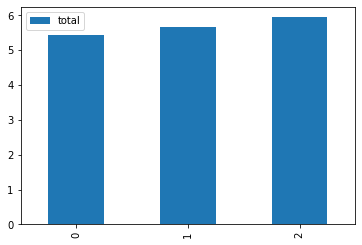

In [69]:
# Instructions
# 100 XP
# Concatenate the three tables together vertically in order with the oldest month first, adding '7Jul', '8Aug', and '9Sep' as keys for their respective months 
# and save to variable avg_inv_by_month.
# Use the .agg() method to find the average of the total column from the grouped invoices.
# Create a bar chart of avg_inv_by_month.

print("----Concatenate the three tables together vertically in order with the oldest month first, adding '7Jul', '8Aug', and '9Sep' as keys for their respective months") 
print("----and save to variable avg_inv_by_month")
inv_jul_thr_sep = pd.concat([inv_jul,inv_aug,inv_sep],keys=["7Jul","8Aug","9Sep"])
print(inv_jul_thr_sep)

print("----Use the .agg() method to find the average of the total column from the grouped invoices.")
inv_jul_thr_sep = inv_jul_thr_sep.reset_index()
avg_inv_by_month = inv_jul_thr_sep.groupby(["level_0"],).agg({'total':"mean"})
avg_inv_by_month = avg_inv_by_month.reset_index()
print(avg_inv_by_month)

print("----Create a bar chart of avg_inv_by_month")
avg_inv_by_month.plot(kind="bar")

In [70]:
# Way to come through! There are many ways to write code for this task. 
# However, concatenating the tables with a key provides a hierarchical index that can be used for grouping. 
# Once grouped, you can average the groups and create plots. 
# You were able to find out that September had the highest average invoice total.

# Using the append method


In [71]:
# Instructions
# 100 XP
# Use the .append() method to combine (in this order) tracks_ride, tracks_master, and tracks_st together vertically, and save to metallica_tracks.
# Merge metallica_tracks and invoice_items on tid with an inner join, and save to tracks_invoices.
# For each tid and name in tracks_invoices, sum the quantity sold column, and save as tracks_sold.
# Sort tracks_sold in descending order by the quantity column, and print the table.

print("----Use the .append() method to combine (in this order) tracks_ride, tracks_master, and tracks_st together vertically, and save to metallica_tracks")
metallica_tracks = tracks_ride.append([tracks_master,tracks_st],sort=False)
print(metallica_tracks.head())

print("----Merge metallica_tracks and invoice_items on tid with an inner join, and save to tracks_invoices")
tracks_invoices = metallica_tracks.merge(invoice_items,on="tid", how = "inner")
print(tracks_invoices.head())

print("----For each tid and name in tracks_invoices, sum the quantity sold column, and save as tracks_sold")
tracks_sold = tracks_invoices.groupby(["tid","name"],as_index=False)["quantity"].agg(sum)
print(tracks_sold)    

print("---Sort tracks_sold in descending order by the quantity column, and print the table")
tracks_sold = tracks_sold.sort_values(by="quantity",ascending=False)
print(tracks_sold)

----Use the .append() method to combine (in this order) tracks_ride, tracks_master, and tracks_st together vertically, and save to metallica_tracks
   i   tid                     name  aid  mtid  gid  u_price composer
0  0  1874     Fight Fire With Fire  154     1    3     0.99      NaN
1  1  1875       Ride The Lightning  154     1    3     0.99      NaN
2  2  1876  For Whom The Bell Tolls  154     1    3     0.99      NaN
3  3  1877            Fade To Black  154     1    3     0.99      NaN
4  4  1878        Trapped Under Ice  154     1    3     0.99      NaN
----Merge metallica_tracks and invoice_items on tid with an inner join, and save to tracks_invoices
   i_x   tid                     name  aid  mtid  gid  u_price  \
0    1  1875       Ride The Lightning  154     1    3     0.99   
1    2  1876  For Whom The Bell Tolls  154     1    3     0.99   
2    2  1876  For Whom The Bell Tolls  154     1    3     0.99   
3    3  1877            Fade To Black  154     1    3     0.99   
4 

In [72]:
# Great work! Even though .append() is less flexible, it's also simpler than .concat(). 
# It looks like Battery, and For Whom The Bell Tolls were the most sold tracks.

# Verifying integrity (VIDEO)

In [73]:
print("----DataFrame 'tracks' ")
print(tracks)
print("----DataFrame 'specs' ")
print(specs)
print("----DataFrame 'albums' ")
print(albums)




# MERGE AND VALIDATE MANY_TO_ONE
print("----Metodo .merge() y argumento validate='many_to_one' para validar si es una relación muchos_a_uno","\n","---Saldrá un mensaje de error","\n")
# x = tracks.merge(specs,on="tid",validate="many_to_one") #Devuelve un error

# MERGE AND VALIDATE MANY_TO_MANY
print("----Metodo .merge() y argumento validate='many_to_many' para validar si es una relación muchos_a_muchos","\n","---Saldrá un mensaje de error","\n")
# x = tracks.merge(specs,on="tid",validate="many_to_many") #Devuelve un error

# MERGE AND VALIDATE ONE_TO_ONE
print("----Metodo .merge() y argumento validate='one_to_one' para validar si es una relación uno_a_uno","\n","---Saldrá un mensaje de error","\n")
# x = tracks.merge(specs,on="tid",validate="one_to_one") #Devuelve un error

# MERGE AND VALIDATE ONE_TO_MANY
print("----Metodo .merge() y argumento validate='one_to_many' para validar si es una relación uno_a_muchos")
x = albums.merge(tracks,on="aid",validate="one_to_many")
print(x)




# VERIFYING CONCATENATIONS
print("----Metodo df.concat() y argumento 'verify_integrity=True' para verificar que no haya duplicidad en los indices de la concatenación")
# pd.concat([inv_jul,inv_jul], verify_integrity=True) #Devuelve el error:  Indexes have overlapping values




# Verificar la integridad es util por las siguientes razones:
# Datos reales usualmente no estan limpios.
# Arreglar datos incorrectos.
# Eliminar filas duplicadas.

----DataFrame 'tracks' 
   tid             name  aid  mtid  gid  u_price
0    2    Balls to the…    2     2    1     0.99
1    3  Fast As a Shark    3     2    1     0.99
2    4    Restless and…    3     2    1     0.99
----DataFrame 'specs' 
   tid  milliseconds    bytes
0    2        342562  5510424
1    3        230619  3990994
2    2        252051  4331770
----DataFrame 'albums' 
       i  aid                                              title  artid
0      0    1              For Those About To Rock We Salute You      1
1      1    2                                  Balls to the Wall      2
2      2    3                                  Restless and Wild      2
3      3    4                                  Let There Be Rock      1
4      4    5                                           Big Ones      3
..   ...  ...                                                ...    ...
342  342  343                             Respighi:Pines of Rome    226
343  343  344  Schubert: The Late Str

# Validating a merge

In [74]:
# Instructions
# You have been given 2 tables, artists, and albums. 
# Use the IPython shell to merge them using artists.merge(albums, on='artid').head(). 
# Adjust the validate argument to answer which statement is FALSE.
# 50 XP
# Possible Answers:

#    You can use 'many_to_many' without an error, since there is a duplicate key in one of the tables.  
#    You can use 'one_to_many' without error, since there is a duplicate key in the right table.
#    You can use 'many_to_one' without an error, since there is a duplicate key in the left table.       <- Respuesta Correcta

# artists.merge(albums,on="artid",validate="many_to_many")
# artists.merge(albums,on="artid",validate="one_to_many")
# artists.merge(albums,on="artid",validate="many_to_one") #Esta es la que devuelve el error

In [75]:
# That's correct! This statement is false. 
# There is a duplicate value in the artid column in the albums table, which is the right table in this merge. 
# Therefore, setting validate equal to 'many_to_one' or 'one_to_one' will raise an error, making this statement false.

# Concatenate and merge to find common songs

In [76]:
# Instructions 1/2
# 50 XP
# 1
# Concatenate the classic_18 and classic_19 tables vertically where the index goes from 0 to n-1, and save to classic_18_19.
# Concatenate the pop_18 and pop_19 tables vertically where the index goes from 0 to n-1, and save to pop_18_19.

print("----Concatenate the classic_18 and classic_19 tables vertically where the index goes from 0 to n-1, and save to classic_18_19")
classic_18_19 = pd.concat([classic_18,classic_19],ignore_index=True)
print(classic_18_19.head())

print("----Concatenate the pop_18 and pop_19 tables vertically where the index goes from 0 to n-1, and save to pop_18_19")
pop_18_19 = pd.concat([pop_18,pop_19],ignore_index=True)
print(pop_18_19.head())

----Concatenate the classic_18 and classic_19 tables vertically where the index goes from 0 to n-1, and save to classic_18_19
      i  pid   tid
0  8527   12  3483
1  8586   12  3416
2  8533   12  3489
3  8523   12  3479
4  8558   12  3440
----Concatenate the pop_18 and pop_19 tables vertically where the index goes from 0 to n-1, and save to pop_18_19
      i  pid   tid
0  3150    1  3063
1   315    1  2712
2  2178    1  2641
3  2772    1  2271
4   430    1   919


In [77]:
# Instructions 2/2
# 50 XP
# 2
# With classic_18_19 on the left, merge it with pop_18_19 on tid using an inner join.
# Use .isin() to filter classic_18_19 where tid is in classic_pop.

print("----With classic_18_19 on the left, merge it with pop_18_19 on tid using an inner join")
classic_pop = classic_18_19.merge(pop_18_19,on="tid",how="inner")
print(classic_pop)

print("----Use .isin() to filter classic_18_19 where tid is in classic_pop")
popular_classic = classic_18_19[classic_18_19["tid"].isin(classic_pop["tid"])]
print(popular_classic)

----With classic_18_19 on the left, merge it with pop_18_19 on tid using an inner join
    i_x  pid_x   tid  i_y  pid_y
0  8523     12  3479  529      1
1  8557     12  3439  506      1
2  8563     12  3445  501      1
3  8567     12  3449  496      1
4  8555     12  3437  520      1
5  8553     12  3435  510      1
----Use .isin() to filter classic_18_19 where tid is in classic_pop
       i  pid   tid
3   8523   12  3479
10  8557   12  3439
21  8563   12  3445
23  8567   12  3449
48  8555   12  3437
50  8553   12  3435


In [78]:
# Excellent work! In this exercise, you demonstrated many of the concepts discussed in this chapter, including concatenation, 
# and semi-joins. You now have experience combining data vertically and using semi- and anti-joins. Time to move on to the next chapter!

# <span style="color:red"> Chapter 4 Merging Ordered and Time-Series Data </span>

In [466]:
import numpy as np
import pandas as pd

sp500 = pd.read_excel("sp500.xlsx")
gdp = pd.read_excel("gdp.xlsx",sheet_name="Hoja1")
unemployment = pd.read_excel("unemployment.xlsx",sheet_name="Hoja1")
inflation = pd.read_excel("inflation.xlsx")
gdp_1 = pd.read_excel("gdp_1.xlsx")
pop = pd.read_excel("pop.xlsx")
jpm = pd.read_excel("jpm.xlsx")
wells = pd.read_excel("wells.xlsx")
bac = pd.read_excel("bac.xlsx")
gdp_2 = pd.read_excel("gdp_2.xlsx")
recession = pd.read_excel("recession.xlsx")
social_fin = pd.read_excel("social_fin.xlsx")
gdp_3 = pd.read_excel("gdp_3.xlsx")
inflation_2 = pd.read_excel("inflation_2.xlsx")
ur_wide = pd.read_excel("ur_wide.xlsx")
ten_yr = pd.read_excel("ten_yr.xlsx")
dji = pd.read_excel("dji.xlsx")
appl = pd.read_excel("appl.xlsx")
mcd = pd.read_excel("mcd.xlsx")
visa = pd.read_excel("visa.xlsx")
ibm = pd.read_excel("ibm.xlsx")
stocks = pd.read_excel("stocks.xlsx")

# Crear el Data Frame stostocks_long
stocks_long = stocks.set_index("date").stack().reset_index()
stocks_long.columns = ["date","stock","close"]
stocks_long = stocks_long.sort_values(by=["stock","date"])
social_fin_1 = pd.read_csv("social_fin_1.csv")

#     Using merge_ordered() (VIDEO)

In [80]:
print("----Data Frame appl:")
print(appl)
print("----Data Frame cmd")
print(mcd)

# METODO PD.MERGE_ORDERED() PARA REALIZAR UN JOIN Y OBTENER UN DATAFRAME ORDENADO
print("----Método pd.merge_ordered() permite realizar un join y obtener los resultados ordenados. Por defaul se genera un Outer Join")
x = pd.merge_ordered(appl, mcd, on="date", suffixes=("_appl","_mcd"))
print(x)

# ARGUMENTO FILL_METHOD PARA ESTABLECER EL LLENADO DE VALORES NA
print("----Metodo pd.merge_ordered() y argumento 'fill_method=ffill' para llenar los valores Na con el valor de adelante")
x = pd.merge_ordered(appl, mcd, on="date", suffixes=("_appl","_mcd"), fill_method="ffill")
print(x)

# CUANDO USAR PD.MERGE_ORDERED()
# Al trabajar con datos ordenados y series de tiempo
# El argumento fill_method ayuda a imputar los valores perdidos

----Data Frame appl:
        date  close
0 2007-02-01  12.08
1 2007-03-01  13.27
2 2007-04-01  14.25
3 2007-05-01  17.31
4 2007-06-01  17.43
----Data Frame cmd
        date  close
0 2007-01-01  44.34
1 2007-02-01  43.68
2 2007-03-01  45.84
3 2007-04-01  48.27
4 2007-05-01  50.54
----Método pd.merge_ordered() permite realizar un join y obtener los resultados ordenados. Por defaul se genera un Outer Join
        date  close_appl  close_mcd
0 2007-01-01         NaN      44.34
1 2007-02-01       12.08      43.68
2 2007-03-01       13.27      45.84
3 2007-04-01       14.25      48.27
4 2007-05-01       17.31      50.54
5 2007-06-01       17.43        NaN
----Metodo pd.merge_ordered() y argumento 'fill_method=ffill' para llenar los valores Na con el valor de adelante
        date  close_appl  close_mcd
0 2007-01-01         NaN      44.34
1 2007-02-01       12.08      43.68
2 2007-03-01       13.27      45.84
3 2007-04-01       14.25      48.27
4 2007-05-01       17.31      50.54
5 2007-06-01

# Correlation between GDP and S&P500

In [81]:
# Instructions 1/3
# 35 XP
# 1
# Use merge_ordered() to merge gdp and sp500 using a left join on year and date. Save the results as gdp_sp500.
# Print gdp_sp500 and look at the returns for the year 2018.

gdp_sp500 = pd.merge_ordered(gdp,sp500,left_on="year",right_on="date",how="left")
print(gdp_sp500)

  country code  year             gdp    date  returns
0          USA  2010  14992100000000  2010.0    12.78
1          USA  2011  15542600000000  2011.0     0.00
2          USA  2012  16197000000000  2012.0    13.41
3          USA  2012  16197000000000  2012.0    13.41
4          USA  2013  16784800000000  2013.0    29.60
5          USA  2014  17521700000000  2014.0    11.39
6          USA  2015  18219300000000  2015.0    -0.73
7          USA  2016  18707200000000  2016.0     9.54
8          USA  2017  19485400000000  2017.0    19.42
9          USA  2018  20494100000000     NaN      NaN


In [82]:
# Instructions 2/3
# 35 XP
# 2
# Use merge_ordered(), again similar to before, to merge gdp and sp500 use the function's ability to 
# interpolate missing data to forward fill the missing value for returns, assigning this table to the variable gdp_sp500.

gdp_sp500 = pd.merge_ordered(gdp,sp500,left_on="year",right_on="date",how="left",fill_method="ffill")
print(gdp_sp500)

  country code  year             gdp  date  returns
0          USA  2010  14992100000000  2010    12.78
1          USA  2011  15542600000000  2011     0.00
2          USA  2012  16197000000000  2012    13.41
3          USA  2012  16197000000000  2012    13.41
4          USA  2013  16784800000000  2013    29.60
5          USA  2014  17521700000000  2014    11.39
6          USA  2015  18219300000000  2015    -0.73
7          USA  2016  18707200000000  2016     9.54
8          USA  2017  19485400000000  2017    19.42
9          USA  2018  20494100000000  2017    19.42


In [83]:
# Instructions 3/3
# 30 XP
# 3
# Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.
# Print the correlation matrix of the gdp_returns table.

gdp_returns = gdp_sp500[["gdp","returns"]]
print(gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.212173
returns  0.212173  1.000000


In [84]:
# Awesome work! You can see the different aspects of merge_ordered() 
# and how you might use it on data that can be ordered. 
# By using this function, you were able to fill in the missing data from 2019. 
# Finally, the correlation of 0.21 between the GDP and S&P500 is low to moderate at best. 
# You may want to find another predictor if you plan to play in the stock market.

# Phillips curve using merge_ordered()


----Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy
          date      cpi      seriesid                   data_type  \
0   2014-01-01  235.288   CUSR0000SA0   SEASONALLY ADJUSTED INDEX   
1   2014-06-01  237.231   CUSR0000SA0   SEASONALLY ADJUSTED INDEX   
2   2015-01-01  234.718   CUSR0000SA0   SEASONALLY ADJUSTED INDEX   
3   2015-06-01  237.684   CUSR0000SA0   SEASONALLY ADJUSTED INDEX   
4   2016-01-01  237.833   CUSR0000SA0   SEASONALLY ADJUSTED INDEX   
5   2016-06-01  240.167   CUSR0000SA0   SEASONALLY ADJUSTED INDEX   
6   2017-01-01  243.780   CUSR0000SA0   SEASONALLY ADJUSTED INDEX   
7   2017-06-01  244.182   CUSR0000SA0   SEASONALLY ADJUSTED INDEX   
8   2018-01-01  248.884   CUSR0000SA0   SEASONALLY ADJUSTED INDEX   
9   2018-06-01  251.134   CUSR0000SA0   SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3     

<AxesSubplot:xlabel='unemployment_rate', ylabel='cpi'>

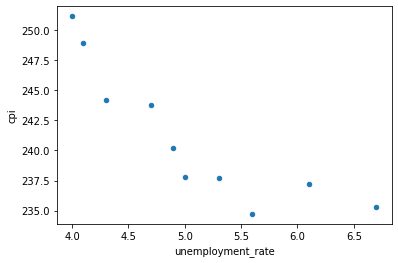

In [102]:
# Instructions
# 100 XP
# Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy.
# Print the inflation_unemploy variable.
# Using inflation_unemploy, create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis.


print("----Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy")
inflation_unemploy = pd.merge_ordered(inflation,unemployment,on="date",how="inner")
print(inflation_unemploy)

print("----Using inflation_unemploy, create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis")
inflation_unemploy.plot(x="unemployment_rate",y="cpi",kind="scatter")

# merge_ordered() caution, multiple columns


In [124]:
# Instructions 1/2
# 50 XP
# 1
# Use merge_ordered() on gdp and pop, merging on columns date and country with the fill feature, save to ctry_date.
# When you merge on date first, the table is sorted by date then country. When forward fill is applied.

ctry_date = pd.merge_ordered(gdp_1,pop,on=["date","country"],fill_method="ffill")
ctry_date.head()

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Sweden,79837.84599,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
1,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-04-01,Sweden,80582.28597,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1990-07-01,Sweden,79974.36017,NYGDPMKTPSAKD,17065100,SP.POP.TOTL


In [123]:
# Instructions 2/2
# 50 XP
# 2
# Perform the same merge of gdp and pop, but join on country and date (reverse of step 1) with the fill feature, saving this as date_ctry.
# When you merge on country first, the table is sorted by country then date, so the forward fill is applied appropriately in this situation.

date_ctry = pd.merge_ordered(gdp_1,pop,on=["country","date"],fill_method="ffill")
date_ctry.head()

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Sweden,79837.84599,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
1,1990-04-01,Sweden,80582.28597,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-07-01,Sweden,79974.36017,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-09-01,Sweden,80106.49738,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1991-01-01,Sweden,79524.24192,NYGDPMKTPSAKD,8617375,SP.POP.TOTL


# Using merge_asof() (VIDEO)

In [145]:
# MERGE_ASOF()
# Similar a un pd.merge_ordered() con left_join
# Realizar el 'match' con los valores más cercanos a la columna llave y no sobre valores exactos.
# Se puede elegir que el match sea con los valore más cercanos por abajo, por arriba, o en cualquier dirección.

print("----Data Frame visa:")
print(visa)
print("----Data Frame ibm:")
print(ibm)

print("----Metodo pd.merge_asof() para realizar un join con coincidencias aproximadas")
x = pd.merge_asof(visa,ibm,on="date_time",suffixes=("_visa","_ibm"))
print(x)

print("----Metodo pd.merge_asof() para realizar un join con coincidencias aproxiamdas")
print("----Argumento direction='forward' para elegir que la llave de la tabla izquierda debe ser mayor o igual a la llave de la tabla derecha")
x = pd.merge_asof(visa,ibm,on="date_time",suffixes=("_visa","_ibm"),direction="forward")
print(x)

print("----Metodo pd.merge_asof() para realizar un join con coincidencias aproximadas")
print("----Argumento direction='nearest' para elegir que la llave de la tabla izquierda sera la más cercana a la llave de la tabla derecha")
x = pd.merge_asof(visa,ibm,on="date_time",suffixes=("_visa","_ibm"),direction="nearest")
print(x)

----Data Frame visa:
            date_time     close
0 2017-11-17 16:00:00  110.3200
1 2017-11-17 17:00:00  110.2400
2 2017-11-17 18:00:00  110.0650
3 2017-11-17 19:00:00  110.0400
4 2017-11-17 20:00:00  110.0000
5 2017-11-17 21:00:00  109.9966
6 2017-11-17 22:00:00  109.8200
----Data Frame ibm:
             date_time     close
0  2017-11-17 15:35:12  149.3000
1  2017-11-17 15:40:34  149.1300
2  2017-11-17 15:45:50  149.9800
3  2017-11-17 15:50:20  149.9900
4  2017-11-17 15:55:10  149.1100
5  2017-11-17 16:00:03  149.2500
6  2017-11-17 16:05:06  149.5175
7  2017-11-17 16:10:12  149.5700
8  2017-11-17 16:15:30  149.5900
9  2017-11-17 16:20:32  149.8200
10 2017-11-17 16:25:47  149.9600
----Metodo pd.merge_asof() para realizar un join con coincidencias aproximadas
            date_time  close_visa  close_ibm
0 2017-11-17 16:00:00    110.3200     149.11
1 2017-11-17 17:00:00    110.2400     149.96
2 2017-11-17 18:00:00    110.0650     149.96
3 2017-11-17 19:00:00    110.0400     149.96
4 2

# Using merge_asof() to study stocks

----Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells
             date_time    close  close_wells
0  2017-11-17 15:35:17  98.1200      54.3227
1  2017-11-17 15:40:04  98.1800      54.3200
2  2017-11-17 15:45:01  97.7307      54.1900
3  2017-11-17 15:50:55  97.7400      54.1700
4  2017-11-17 15:55:00  97.8150      54.1841
5  2017-11-17 16:00:30  98.0200      54.2650
6  2017-11-17 16:05:07  97.8000      54.2000
7  2017-11-17 16:10:08  97.8400      54.1550
8  2017-11-17 16:15:11  97.7100      54.1900
9  2017-11-17 16:20:29  97.7600      54.2050
10 2017-11-17 16:25:25  97.8200      54.2300
11 2017-11-17 16:30:53  97.9500      54.2200
12 2017-11-17 16:35:11  97.9900      54.2200
13 2017-11-17 16:40:44  98.0600      54.2800
14 2017-11-17 16:45:52  98.0500      54.2400
15 2017-11-17 16:50:37  98.1101      54.1700
16 2017-11-17 16:55:02  98.1800      54.1

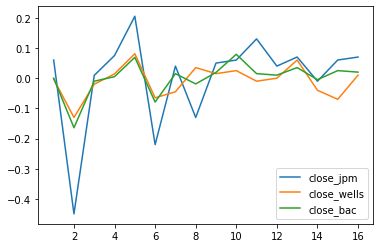

In [167]:
# Instructions
# 100 XP
# Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.
# Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.
# Compute price diff
# Using price_diffs, create a line plot of the close price of JPM, WFC, and BAC only.

print("----Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells")
jpm_wells = pd.merge_asof(jpm,wells,on="date_time",direction="nearest",suffixes=("","_wells"))
print(jpm_wells)


print("----Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac")
jpm_wells_bac = pd.merge_asof(jpm_wells,bac,on="date_time",direction="nearest",suffixes=("_jpm","_bac"))
print(jpm_wells_bac)

print("----Compute price diff")
price_diffs = jpm_wells_bac.diff()
print(price_diffs)

print("----Using price_diffs, create a line plot of the close price of JPM, WFC, and BAC only")
price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
plt.show()

# Fabulous! You can see that during this period, the price change for these bank stocks was roughly the same, although the price change 
# for JP Morgan was more variable. The critical point here is that the merge_asof() function is very useful in performing the fuzzy 
# matching between the timestamps of all the tables.

# Using merge_asof() to create dataset


----Using merge_asof(), merge gdp_2 and recession on date, with gdp as the left table. Save to the variable gdp_recession
         date       gdp econ_status
0  1979-01-01  2526.610         NaN
1  1979-04-01  2591.247         NaN
2  1979-07-01  2667.565         NaN
3  1979-10-01  2723.883         NaN
4  1980-01-01  2789.842   recession
5  1980-04-01  2797.352   recession
6  1980-07-01  2856.483   recession
7  1980-10-01  2985.557      normal
8  1981-01-01  3124.206      normal
9  1981-04-01  3162.532      normal
10 1981-07-01  3260.609   recession
11 1981-10-01  3280.818   recession
12 1982-01-01  3274.302   recession
13 1982-04-01  3331.972   recession
14 1982-07-01  3366.322   recession
15 1982-10-01  3402.561   recession
16 1983-01-01  3473.413      normal
17 1983-04-01  3578.848      normal
18 1983-07-01  3689.179      normal
19 1983-10-01  3794.706      normal
20 1984-01-01  3908.054      normal
21 1984-04-01  4009.601      normal
22 1984-07-01  4084.250      normal
23 1984-10-01 

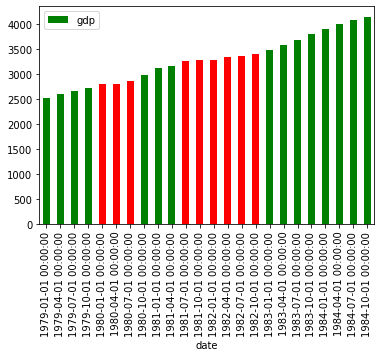

In [187]:
# Instructions
# 100 XP
# Using merge_asof(), merge gdp_2 and recession on date, with gdp_2 as the left table. Save to the variable gdp_recession.
# Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.
# Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession.

print("----Using merge_asof(), merge gdp_2 and recession on date, with gdp as the left table. Save to the variable gdp_recession")
gdp_recession = pd.merge_asof(gdp_2,recession,on="date")
print(gdp_recession)

print("----Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'")
is_recession = ['r' if s == 'recession' else 'g' for s in gdp_recession['econ_status']]
print(is_recession)

print("----Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession")
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

# You can see from the chart that there were a number of quarters early in the 1980s where a recession was an issue. 
# merge_asof() allowed you to quickly add a flag to the gdp dataset by matching between two different dates, 
# in one line of code! If you were to perform the same task using subsetting, it would have taken a lot more code.

# merge_asof() and merge_ordered() differences

In [190]:
# Instructions
# 100XP
# Drag and drop the statement into the appropriate box for either the merge_asof() function, the merge_ordered() function, 
# or both if it applies to both functions.

# Selecting data with .query() (VIDEO)

In [233]:
# THE .QUERY() METHOD

print("----Data Frame 'stocks' ")
print(stocks)
print("----Data Frame stocks_long")
print(stocks_long)

print("----Metodo .query() para realizar una selección de datos en el Data Frame stocks")
x = stocks.query("nike >= 90")
print(x)

print("----Metodo .query() para realizar una selección de datos en el Data Frame stocks")
print("----'and' y 'or' para condiciones multiples")
x = stocks.query('nike > 90 and disney > 150')
print(x)

print("----Metodo .query() para realizar una selección de datos en el Data Frame stocks")
print("----'and' y 'or' para condiciones multiples y () para agrupar las condiciones")
x = stocks_long.query(" (stock == 'disney') or (stock == 'nike' and close > 100)")
print(x)

----Data Frame 'stocks' 
        date      disney        nike
0 2019-07-01  143.009950   86.029999
1 2019-08-01  137.259995   84.500000
2 2019-09-01  130.320007   93.919998
3 2019-10-01  129.919998   89.550003
4 2019-11-01  151.580002   93.489998
5 2019-12-01  144.630005  101.309998
6 2019-12-01  138.309998   96.300003
7 2020-01-01  117.650002   89.379997
8 2020-02-01   96.599998   82.739998
9 2020-03-01   99.580002   84.629997
----Data Frame stocks_long
         date   stock       close
0  2019-07-01  disney  143.009950
2  2019-08-01  disney  137.259995
4  2019-09-01  disney  130.320007
6  2019-10-01  disney  129.919998
8  2019-11-01  disney  151.580002
10 2019-12-01  disney  144.630005
12 2019-12-01  disney  138.309998
14 2020-01-01  disney  117.650002
16 2020-02-01  disney   96.599998
18 2020-03-01  disney   99.580002
1  2019-07-01    nike   86.029999
3  2019-08-01    nike   84.500000
5  2019-09-01    nike   93.919998
7  2019-10-01    nike   89.550003
9  2019-11-01    nike   93.4899

# Explore financials with .query()


In [260]:
# Instructions
# 50 XP
# You have been given a table of financial data from some popular social network companies called "social_fin" 
# All of the values are in thousands of US dollars.
# Use the .query() method and the IPython shell to explore social_fin and select the only one True statement.

# Possible Answers

# There 2 rows where the value is greater than $50,000,000K.

# There are 3 rows for total revenue for Facebook.

# There are 6 rows where the net income has a negative value.          <- RESPUESTA CORRECTA

# There are 45 rows, where the gross profit is greater than $100K.

print("----There 2 rows where the value is greater than $50,000,000K? FALSE")
print(social_fin.query("value > 50000000"))

print("----There are 3 rows for total revenue for Facebook? FALSE")
print(social_fin.query("company == 'facebook' and financial == 'total_revenue' "))

print("----There are 6 rows where the net income has a negative value? TRUE")
print(social_fin.query("(value < 0) and (financial=='net_income')"))

print("----There are 45 rows, where the gross profit is greater than $100K? FALSE")
print(social_fin.query("(value > 100) and (financial=='gross_profit')"))

----There 2 rows where the value is greater than $50,000,000K? FALSE
        financial   company  year     value
5   total_revenue  facebook  2019  70697000
7    gross_profit  facebook  2019  57927000
20  total_revenue  facebook  2018  55838000
----There are 3 rows for total revenue for Facebook? FALSE
        financial   company  year     value
5   total_revenue  facebook  2019  70697000
20  total_revenue  facebook  2018  55838000
35  total_revenue  facebook  2017  40653000
50  total_revenue  facebook  2016  27638000
----There are 6 rows where the net income has a negative value? TRUE
     financial  company  year    value
14  net_income     snap  2019 -1033660
29  net_income     snap  2018 -1255911
34  net_income  twitter  2017  -108063
44  net_income     snap  2017 -3445066
49  net_income  twitter  2016  -456873
59  net_income     snap  2016  -514643
----There are 45 rows, where the gross profit is greater than $100K? FALSE
       financial   company  year     value
2   gross_profit

# Subsetting rows with .query()

----Use merge_ordered() on gdp_3 and pop on columns country and date with the fill feature, save to gdp_pop and print
        date     country          gdp   series_code_x      pop series_code_y
0 1990-01-01      Sweden  79837.84599   NYGDPMKTPSAKD  8558835   SP.POP.TOTL
1 1990-04-01      Sweden  80582.28597   NYGDPMKTPSAKD  8558835   SP.POP.TOTL
2 1990-07-01      Sweden  79974.36017   NYGDPMKTPSAKD  8558835   SP.POP.TOTL
3 1990-09-01      Sweden  80106.49738   NYGDPMKTPSAKD  8558835   SP.POP.TOTL
4 1991-01-01      Sweden  79524.24192   NYGDPMKTPSAKD  8617375   SP.POP.TOTL
----Add a column named gdp_per_capita to gdp_pop that divides gdp by pop
        date     country          gdp   series_code_x      pop series_code_y  \
0 1990-01-01      Sweden  79837.84599   NYGDPMKTPSAKD  8558835   SP.POP.TOTL   
1 1990-04-01      Sweden  80582.28597   NYGDPMKTPSAKD  8558835   SP.POP.TOTL   
2 1990-07-01      Sweden  79974.36017   NYGDPMKTPSAKD  8558835   SP.POP.TOTL   
3 1990-09-01      Sweden  8

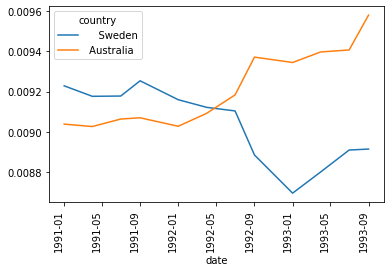

In [288]:
# Instructions 1/4
# 100 XP
# Use merge_ordered() on gdp_3 and pop on columns country and date with the fill feature, save to gdp_pop and print.
# Add a column named gdp_per_capita to gdp_pop that divides gdp by pop.
# Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot.
# Use .query() to select rows from gdp_pivot where date is greater than equal to 1991-01-01". Save as recent_gdp_pop.

print("----Use merge_ordered() on gdp_3 and pop on columns country and date with the fill feature, save to gdp_pop and print")
gdp_pop = pd.merge_ordered(gdp_3,pop,on=["country","date"],fill_method="ffill")
print(gdp_pop.head())

print("----Add a column named gdp_per_capita to gdp_pop that divides gdp by pop")
gdp_pop["gdp_per_capita"] = gdp_pop["gdp"]/gdp_pop["pop"]
print(gdp_pop.head())

print("----Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot.")
gdp_pivot = gdp_pop.pivot_table(values="gdp_per_capita",index="date",columns="country")
print(gdp_pivot.head())

print("----Use .query() to select rows from gdp_pivot where date is greater than equal to 1991-01-01. Save as recent_gdp_pop")
recent_gdp_pop = gdp_pivot.query("date >= '1991-01-01' ")
print(recent_gdp_pop)

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

# You can see from the plot that the per capita GDP of Australia passed Sweden in 1992. 
# By using the .query() method, you were able to select the appropriate rows easily. 
# The .query() method is easy to read and straightforward.

# Reshaping data with .melt()


In [417]:
print("----Data Frame social_fin_1")
print(social_fin_1.head())

# METODO .MELT()
print("\n----Metodo .melt() para poner los nombres de columnas como valores de una sola columna:")
x = social_fin_1.melt(id_vars=["financial","company"])
print(x.head())

# ARGUMENTO 'VALUE_VARS'
print("\n----Metodo .melt() para poner los nombres de columnas como valores de una sola columna:")
print( "----Argumento 'value_vars' para indicar cuales columnas queremos conservar")
x = social_fin_1.melt(id_vars=["financial","company"],value_vars=["2018","2017"])
print(x)

# ARGUMENTO 'VALUE_NAME' Y 'VAR_NAME'
print("\n----Metodo .melt() para poner los nombres de columnas como valores de una sola columna:")
print( "----Argumento 'var_name' y 'value_name'para indicar el nombre especifico de las nuevas columnas")
x = social_fin_1.melt(id_vars=["financial","company"],value_vars=["2018","2017"],var_name="year",value_name="dolars")
print(x.head())

----Data Frame social_fin_1
         financial   company      2019      2018      2017      2016
0  cost_of_revenue  facebook  12770000   9355000   5454000   3789000
1  cost_of_revenue      snap    895838    798865    717462    451660
2  cost_of_revenue   twitter   1137041    964997    861242    932240
3     gross_profit  facebook  57927000  46483000  35199000  23849000
4     gross_profit      snap    819696    381581    107487    -47178

----Metodo .melt() para poner los nombres de columnas como valores de una sola columna:
         financial   company variable     value
0  cost_of_revenue  facebook     2019  12770000
1  cost_of_revenue      snap     2019    895838
2  cost_of_revenue   twitter     2019   1137041
3     gross_profit  facebook     2019  57927000
4     gross_profit      snap     2019    819696

----Metodo .melt() para poner los nombres de columnas como valores de una sola columna:
----Argumento 'value_vars' para indicar cuales columnas queremos conservar
             fina

# Select the right .melt() arguments

In [422]:
# Instructions
# 50 XP
# You are given a table named inflation. Chose the option to get the same output as the table below.

# country    indicator  year  annual
# 0   Brazil  Inflation %  2017    3.45
# 1   Canada  Inflation %  2017    1.60
# 2   France  Inflation %  2017    1.03
# 3    India  Inflation %  2017    2.49
# 4   Brazil  Inflation %  2018    3.66
# 5   Canada  Inflation %  2018    2.27
# 6   France  Inflation %  2018    1.85
# 7    India  Inflation %  2018    4.86
# 8   Brazil  Inflation %  2019    3.73
# 9   Canada  Inflation %  2019    1.95
# 10  France  Inflation %  2019    1.11
# 11   India  Inflation %  2019    7.66

# Possible Answers

print(inflation_2.melt(id_vars=["country","indicator"],var_name="year",value_name="annual"))

    country     indicator  year  annual
0    Brazil   Inflation %  2017    3.45
1    Canada   Inflation %  2017    1.60
2    France   Inflation %  2017    1.03
3     India   Inflation %  2017    2.49
4    Brazil   Inflation %  2018    3.66
5    Canada   Inflation %  2018    2.27
6    France   Inflation %  2018    1.85
7     India   Inflation %  2018    4.86
8    Brazil   Inflation %  2019    3.73
9    Canada   Inflation %  2019    1.95
10   France   Inflation %  2019    1.11
11    India   Inflation %  2019    7.66


# Using .melt() to reshape government data


----Use .melt() to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named month and unempl_rate, respectively. Save the result as ur_tall
     year month  unempl_rate
0    2010   jan          9.8
1    2011   jan          9.1
2    2012   jan          8.3
3    2013   jan          8.0
4    2014   jan          6.6
..    ...   ...          ...
127  2016   dec          4.7
128  2017   dec          4.1
129  2018   dec          3.9
130  2019   dec          3.5
131  2020   dec          NaN

[132 rows x 3 columns]

----Add a column to ur_tall named date which combines the year and month columns as year-month format into a larger string, and converts it to a date data type
     year month  unempl_rate       date
0    2010   jan          9.8 2010-01-01
1    2011   jan          9.1 2011-01-01
2    2012   jan          8.3 2012-01-01
3    2013   jan          8.0 2013-01-01
4    2014   jan          6.6 2014-01-01
..    ...   ...          ... 

<AxesSubplot:xlabel='date'>

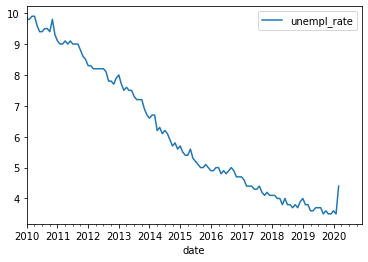

In [471]:
# Instructions
# 100 XP
# Use .melt() to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named month and unempl_rate, respectively. Save the result as ur_tall.
# Add a column to ur_tall named date which combines the year and month columns as year-month format into a larger string, and converts it to a date data type.
# Sort ur_tall by date and save as ur_sorted.
# Using ur_sorted, plot unempl_rate on the y-axis and date on the x-axis.

print("----Use .melt() to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named month and unempl_rate, respectively. Save the result as ur_tall")
ur_tall = ur_wide.melt(id_vars=["year"],var_name="month",value_name="unempl_rate")
print(ur_tall)

print("\n----Add a column to ur_tall named date which combines the year and month columns as year-month format into a larger string, and converts it to a date data type")
ur_tall["date"] = pd.to_datetime((ur_tall['year']).astype(str)+"-"+(ur_tall['month']).astype(str))
print(ur_tall)

print("\n----Sort ur_tall by date and save as ur_sorted")
ur_sorted = ur_tall.sort_values(by="date")
print(ur_sorted)

print("Using ur_sorted, plot unempl_rate on the y-axis and date on the x-axis")
ur_sorted.plot(x='date', y='unempl_rate',kind="line")

# Using .melt() for stocks vs bond performance

----Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc
     metric       date     close
0      open 2007-02-01  0.033491
1      high 2007-02-01 -0.007338
2       low 2007-02-01 -0.016147
3     close 2007-02-01 -0.057190
4      open 2007-03-01 -0.060449
..      ...        ...       ...
135   close 2009-11-01 -0.056309
136    open 2009-12-01 -0.050544
137    high 2009-12-01  0.099327
138     low 2009-12-01  0.007188
139   close 2009-12-01  0.200562

[140 rows x 3 columns]

----Using the .query() method, select only those rows were metric equals 'close', and save to bond_perc_close
    metric       date     close
3    close 2007-02-01 -0.057190
7    close 2007-03-01  0.021538
11   close 2007-04-01 -0.003873
15   close 2007-05-01  0.056156
19   close 2007-06-01  0.029243
 
----Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to 

<AxesSubplot:xlabel='date'>

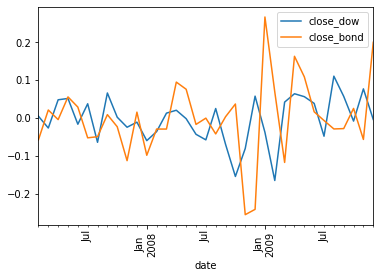

In [501]:
# Instructions
# 100 XP
# Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.
# Using the .query() method, select only those rows were metric equals 'close', and save to bond_perc_close.
# Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.
# Using dow_bond, plot only the Dow and bond values.

print("----Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc")
bond_perc = ten_yr.melt(id_vars="metric",var_name="date",value_name="close")
print(bond_perc)

print("\n----Using the .query() method, select only those rows were metric equals 'close', and save to bond_perc_close")
bond_perc_close = bond_perc.query("metric == ' close' ")
print(bond_perc_close.head())

print(" \n----Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond")
dji["date"] = pd.to_datetime(dji["date"])
dow_bond = pd.merge_ordered(dji,bond_perc_close,on="date",how="inner",suffixes=("_dow","_bond"))
print(dow_bond)

print("\n----# Using dow_bond, plot only the Dow and bond values")
dow_bond.plot(x="date",y=["close_dow","close_bond"],kind="line",rot=90)
